In [1]:
import matplotlib.pyplot as plt
import uproot as urt
import numpy as np
import mplhep as hep
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '../lib')
import json
from treeIO import varData,varpair,var2DData,varMC,rangeMC,var2DMC, ROOTDatasetForXGB, getFile, rangeData
from plotHelper import DrawVarHist

In [2]:
nFileDATA = getFile('Data','Jpsi')[0]
nFileMCPR = getFile('MC','Prompt')[0]
# print(list(map(lambda x : list(x.values())[0],varpair)))
# print(list(varpair.values()))
# print(list(varpair[d].values()) for d in varpair.keys())
    
# DataLoader = ROOTDatasetForXGB(nFileDATA, "dStarana/VertexCompositeNtuple", varData, '20 MB')
DataLoader = ROOTDatasetForXGB(nFileDATA, "skimTreeFlat", varData, '20 MB')
Data2DLoader = ROOTDatasetForXGB(nFileDATA, "skimTreeFlat", list(varpair.keys()), '20 MB')
MCLoader = ROOTDatasetForXGB(nFileMCPR, "skimTreeFlat", varMC, '20 MB')
# MC2DLoader = ROOTDataset(nFileMCPR, "dStarana_mc/VertexCompositeNtuple", list(map(lambda x: x[1], varpair)), '20 MB')
# MC2DLoader = ROOTDatasetForXGB(nFileMCPR, "dStarana_mc/VertexCompositeNtuple", list(varpair.values()), '20 MB')
MC2DLoader = ROOTDatasetForXGB(nFileMCPR, "skimTreeFlat", list(varpair.values()), '20 MB')

In [3]:
varArr = {d : np.empty(0) for d in varData}
varArr2d = {d1: {d2: np.empty(0) for d2 in varData if d1 < d2} for d1 in varData}
uniformHistbin =[1,3,5,7,12,20,100] 
histArr = {
    "DATA" : {
        d : np.histogram([], bins=uniformHistbin)for d in varData
    },
    "MCPR" : {
        d : np.histogram([], bins=uniformHistbin)for d in varData
    }
}
hist2DArr = {
    "DATA" :{
       d1: {d2 : np.histogram2d([],[], bins=uniformHistbin)for d2 in var2DData if d1 < d2} for d1 in var2DData
    },
    "MCPR" :{
       varpair[d1]: {varpair[d2] : np.histogram2d([],[], bins=uniformHistbin)for d2 in list(varpair.keys()) if d1 < d2} for d1 in list(varpair.keys())
    },
}
for d1 in list(varpair.values()):
    for d2 in list(varpair.values()):
        if d1 < d2: print(d1,d2)
    
print(list(varpair.values()))
hist2DArr['MCPR']['matchGen_D1phi']['matchGen_D1pT']


matchGen3DPointingAngle matchGen_D0mass
matchGen3DPointingAngle matchGen_D0pT
matchGen3DPointingAngle matchGen_D0eta
matchGen3DPointingAngle matchGen_D0phi
matchGen3DPointingAngle matchGen_D1decayLength3D_
matchGen3DPointingAngle matchGen_D1pT
matchGen3DPointingAngle matchGen_D1eta
matchGen3DPointingAngle matchGen_D1phi
matchGen3DPointingAngle matchGen_D0Dau1_pT
matchGen3DPointingAngle matchGen_D0Dau2_pT
matchGen3DPointingAngle matchGen_D0Dau1_eta
matchGen3DPointingAngle matchGen_D0Dau2_eta
matchGen2DPointingAngle matchGen3DPointingAngle
matchGen2DPointingAngle matchGen3DDecayLength
matchGen2DPointingAngle matchGen_D0mass
matchGen2DPointingAngle matchGen_D0pT
matchGen2DPointingAngle matchGen_D0eta
matchGen2DPointingAngle matchGen_D0phi
matchGen2DPointingAngle matchGen_D1decayLength3D_
matchGen2DPointingAngle matchGen_D1pT
matchGen2DPointingAngle matchGen_D1eta
matchGen2DPointingAngle matchGen_D1phi
matchGen2DPointingAngle matchGen_D0Dau1_pT
matchGen2DPointingAngle matchGen_D0Dau2_pT
ma

(array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([  1,   3,   5,   7,  12,  20, 100]),
 array([  1,   3,   5,   7,  12,  20, 100]))

In [4]:
# for i, data in enumerate(MCLoader):
#     for tup in data[1]: 
#         print('\''+tup+'\' : ['+str(np.min(data[1][tup]))+', '+str(np.max(data[1][tup]))+']')
#     if i > 0:
#         break

In [5]:

# for i, data in enumerate(DataLoader):
#     print(i)
#     print(data[1].values())
#     for j, tup in enumerate(data[1]):
#         print(tup)
#         # varArr[tup] = np.hstack((varArr[tup], data[1][tup]))
#         # histArr["DATA"][tup][0][:] = np.histogram(data[1][tup], uniformHistbin)[0][:]
#         keyList = list(data[1].keys())
#         # print(keyList)
#         dataValues = np.array(list(data[1].values())).T
#         # print(dataValues)
#         if i == 0 :
#             histArr["DATA"][tup] = np.histogram(
#                 dataValues[:,j],
#                 bins=int(rangeData[tup][1]), 
#                 range=tuple(rangeData[tup][0])
#                 )
#         else :
#             histArr["DATA"][tup][0][:] = np.histogram(
#                 dataValues[:,j],
#                 histArr["DATA"][tup][1]
#                 )[0][:]
#     if i > 5:
#         break


0
dict_values([array([5.1880937, 4.320263 , 5.114836 , ..., 6.745028 , 6.745028 ,
       6.697404 ], dtype=float32), array([-1.2182299 ,  2.0141633 ,  2.1619868 , ..., -0.37427837,
       -0.37545893,  1.9838097 ], dtype=float32), array([-1.2773447 ,  2.114017  ,  2.2237263 , ..., -0.38905555,
       -0.38905555,  2.0203    ], dtype=float32), array([-1.497296  , -0.9294728 , -1.2316818 , ...,  1.348047  ,
        1.348047  ,  0.31234515], dtype=float32), array([2.0072691, 2.067744 , 1.8790184, ..., 1.9613273, 1.8768771,
       1.8780392], dtype=float32)])
pT
y
eta
phi
mass


In [ ]:
for i, data in enumerate(DataLoader):
    print(i)
    for tup in data[1]:
        # varArr[tup] = np.hstack((varArr[tup], data[1][tup]))
        # histArr["DATA"][tup][0][:] = np.histogram(data[1][tup], uniformHistbin)[0][:]
        keyList = list(data[1].keys())
        dataValues = np.array(list(data[1].values())).T
        if i == 0 :
            histArr["DATA"][tup] = np.histogram(
                dataValues,
                bins=int(rangeData[tup][1]), 
                range=tuple(rangeData[tup][0])
                )
        else :
            histArr["DATA"][tup][0][:] = np.histogram(
                dataValues,
                histArr["DATA"][tup][1]
                )[0][:]
    if i > 5:
        break

In [33]:
for i, data in enumerate(MCLoader):
    # print(i)
    for tup in data[1]:
        if(tup =='matchGEN'): continue
        # varArr[tup] = np.hstack((varArr[tup], data[1][tup]))
        keyList = list(data[1].keys())
        dataValues = np.array(list(data[1].values())).T
        if i == 0 :
            histArr["MCPR"][tup] = np.histogram(
                dataValues, 
                bins=int(rangeData[tup][1]), 
                range=tuple(rangeData[tup][0])
                )
        else :
            histArr["MCPR"][tup][0][:] = np.histogram(
                dataValues, 
                histArr["MCPR"][tup][1]
                )[0][:]
    if i > 5:
        break

0


In [31]:

# for i, data in enumerate(MCLoader):
#     for j,tup in enumerate(data[1]):
#         keyList = list(data[1].keys())
#         dataValues = np.array(list(data[1].values())).T
#         if i == 0 :
#             histArr["MCPR"][tup] = np.histogram(
#                 dataValues[:,j], 
#                 bins=int(rangeData[tup][1]), 
#                 range=tuple(rangeData[tup][0])
#                 )
#         else :
#             histArr["MCPR"][tup][0][:] = np.histogram(
#                 dataValues[:,j], 
#                 histArr["MCPR"][tup][1]
#                 )[0][:]
#     if i > 1:
#         break
# for i, data in enumerate(MCLoader):
#     for j,tup in enumerate(data[1]):
#         # print(data[1].keys())
#         if(tup =='matchGEN'): continue
#         keyList = list(data[1].keys())
#         dataValues = np.array(list(data[1].values())).T
#         print(list(data[1].values()))
#         print(len(dataValues),len(dataValues[0]))
#         # print((dataValues[data[1]['matchGEN']])[:,j])
#         # print((dataValues[data[1]['matchGEN']])[:,j])
#         if i == 0 :
#             histArr["MCPR"][tup] = np.histogram(
#                 (dataValues[data[1]['matchGEN']])[:,j], 
#                 # dataValues
#                 bins=int(rangeData[tup][1]), 
#                 range=tuple(rangeData[tup][0])
#                 )
#         else :
#             histArr["MCPR"][tup][0][:] = np.histogram(
#                 (dataValues[data[1]['matchGEN']])[:,j], 
#                 histArr["MCPR"][tup][1]
#                 )[0][:]
#     if i > 1:
#         break

[array([3.6e-43, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
      dtype=float32), array([7.738496 , 7.738496 , 4.7394075, ..., 6.1966643, 4.467487 ,
       4.3795667], dtype=float32), array([ 1.140387 ,  1.1392856,  2.0030077, ..., -0.657727 , -2.2280385,
       -2.242416 ], dtype=float32), array([ 1.1656866 ,  1.1656866 ,  2.081299  , ..., -0.68745196,
       -2.3173814 , -2.3350532 ], dtype=float32), array([-3.0515733, -3.0515733,  1.8455632, ...,  1.1698734,  1.7541778,
        1.7503386], dtype=float32), array([1.9538938, 1.9975629, 1.987177 , ..., 2.023762 , 1.9991437,
       1.9983381], dtype=float32)]
546400 6


IndexError: arrays used as indices must be of integer (or boolean) type

In [34]:
densityArr = {
    "DATA" : { 
        d : np.histogram( histArr["DATA"][d][1][1:], histArr["DATA"][d][1], weights=(histArr["DATA"][d][0]/histArr["DATA"][d][0].sum()), density=True ) for d in varData 
    },
    "MCPR": {
        d : np.histogram( histArr["MCPR"][d][1][1:], histArr["MCPR"][d][1], weights=(histArr["MCPR"][d][0]/histArr["MCPR"][d][0].sum()), density=True ) for d in varData
    }
}

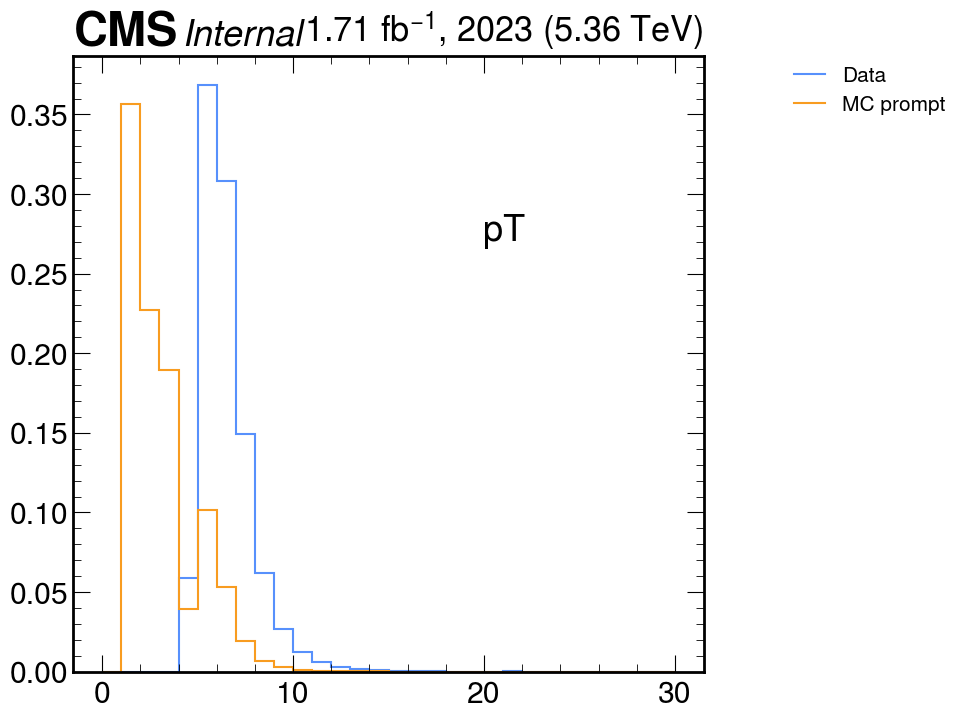

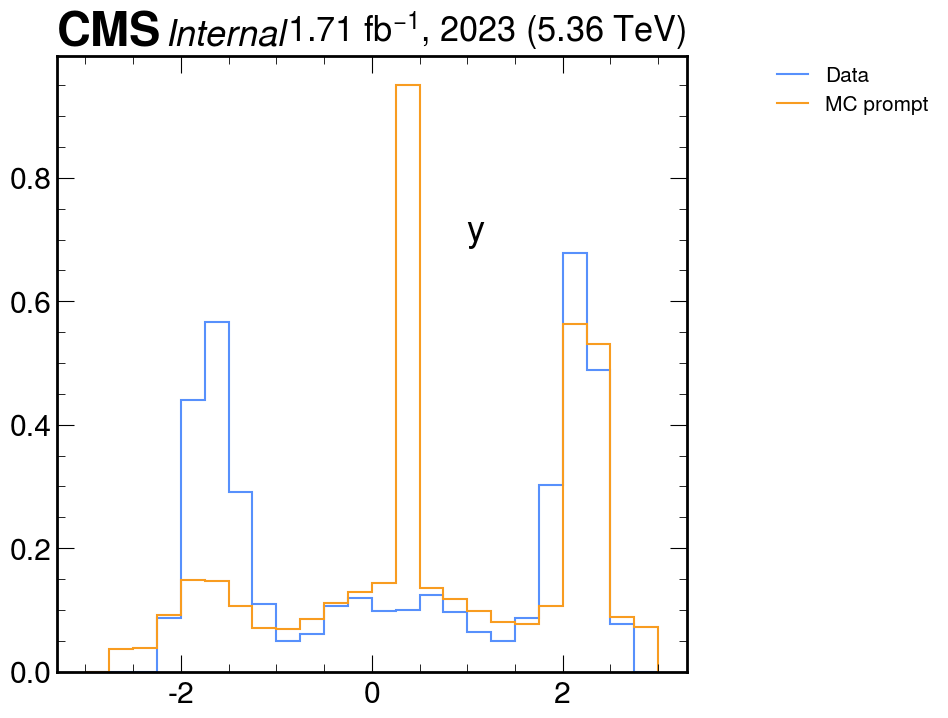

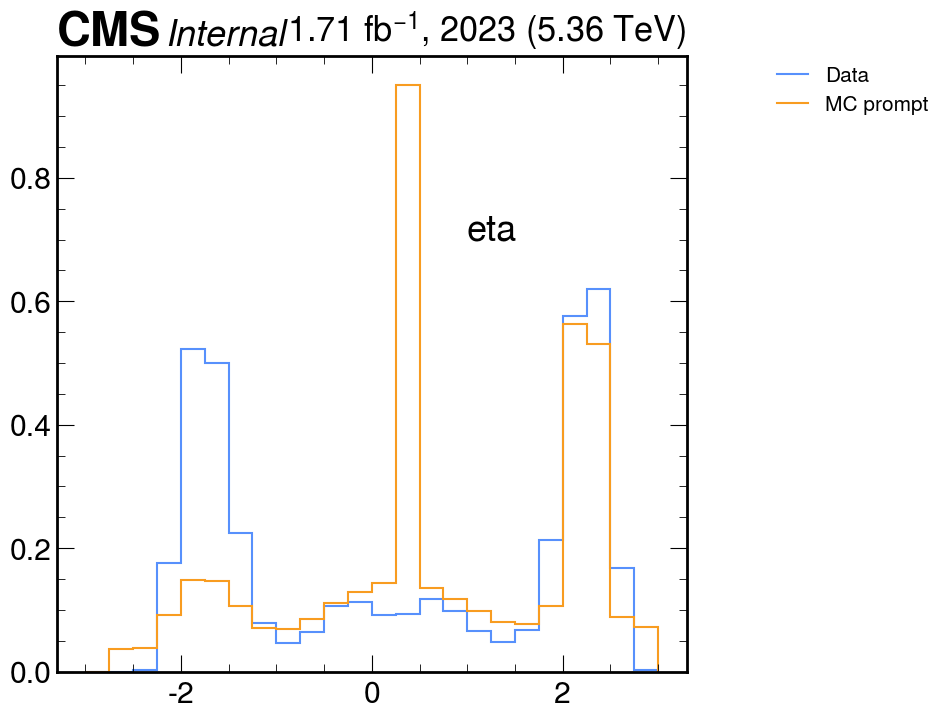

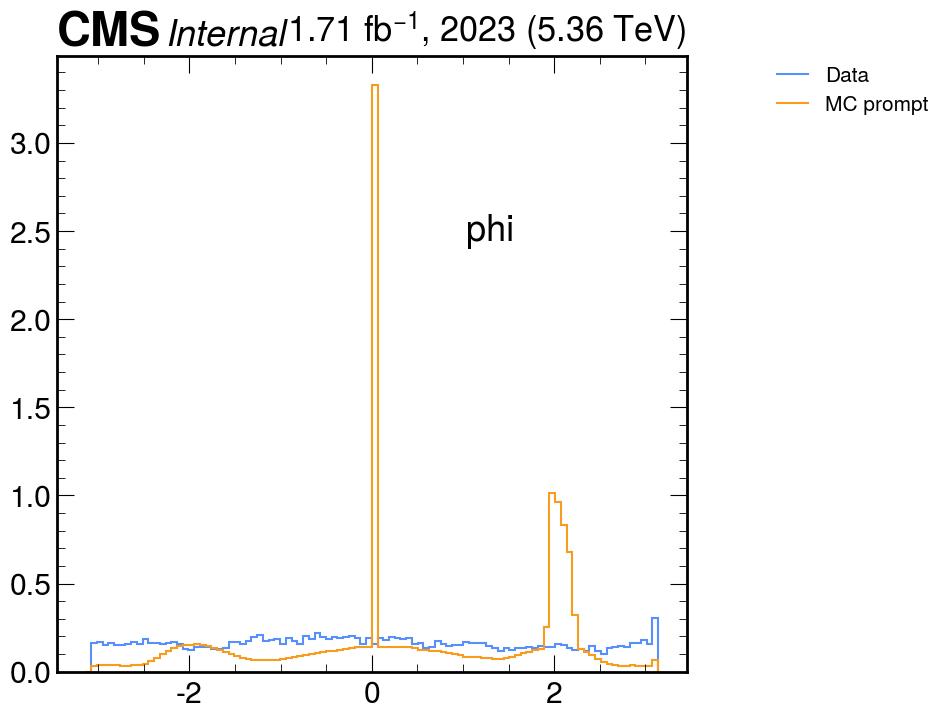

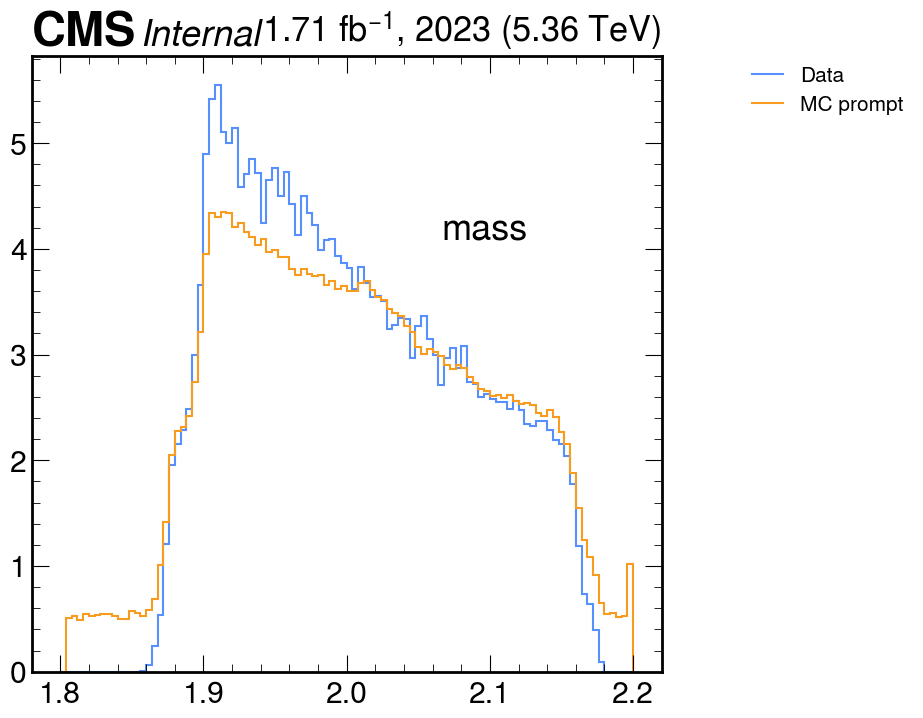

In [35]:
hep.style.use("CMS");
for var1 in varData :
    # for var2 in varData:   
    #     if var2.find(var1): 
    fig, axs = plt.subplot_mosaic([['plt','plt','plt', 'leg']], figsize=(11,8), empty_sentinel='leg');
    # fig, axs = plt.subplot_mosaic([['plt',]], figsize=(11,8), empty_sentinel='leg');
    hep.cms.label('Internal', data=True, lumi=1.71, year=2023, com=5.36);
    # print(fig)
    # print(axs)
    hep.histplot(
        [densityArr["DATA"][var1],densityArr["MCPR"][var1]],
        ax=axs['plt'],
        histtype='step',
        label=["Data", "MC prompt"]
    )
    axs['plt'].legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0., fontsize='xx-small', ncols=1)
    plt.text(0.65, 0.7, var1,transform=axs['plt'].transAxes)
    plt.savefig('variables/'+var1+'.png')

In [34]:
# density2DArr = {
#     "DATA": {},  # Initialize the outer dictionary for DATA
#     "MCPR": {}   # Initialize the outer dictionary for MCPR
# }

# for category in density2DArr:
#     for d in var2DData:
#         for f in var2DData:
#             if d < f:  # This ensures (d, f) and not (f, d)
#                 if d not in density2DArr[category]:
#                     density2DArr[category][d] = {}  # Initialize inner dictionary for 'd'
                    
#                 # Compute the histogram and store it in the dictionary
#                 print(category,d,f)
#                 print(hist2DArr[category][d][f][1][1:])
#                 print(np.meshgrid(hist2DArr[category][d][f][1][1:],  # x values for 2D histogram
#                     hist2DArr[category][d][f][2][1:]))
#                 density2DArr[category][d][f] = np.histogram2d(
#                     np.meshgrid(hist2DArr[category][d][f][1][1:],  # x values for 2D histogram
#                     hist2DArr[category][d][f][2][1:]),
#                     bins=(hist2DArr[category][d][f][1],hist2DArr[category][d][f][2]),
#                     weights=(hist2DArr[category][d][f][0] / hist2DArr[category][d][f][0].sum()), 
#                     density=True
#                 )
                

In [35]:
# hist2DArr['DATA']['2DPointingAngle']['3DPointingAngle']
# print(hist2DArr['MCPR'][varpair['2DPointingAngle']][varpair['3DPointingAngle']])

In [36]:
defaultbinning = 100
for i, data in enumerate(Data2DLoader):
    two_d_dict = {}
    # print(i)
    # print(data[1])
    for tup1 in data[1]:
        for tup2 in data[1]:
            if tup1 < tup2:
                if tup1 not in two_d_dict:
                    two_d_dict[tup1] = {} #initialize the inner dictionary)
                two_d_dict[tup1][tup2] = (data[1][tup1], data[1][tup2])
                print(data[1][tup1],data[1][tup2])
                if tup1 not in rangeData:
                    rangeData[tup1]=[(np.min(data[1][tup1]),np.max(data[1][tup1])),defaultbinning]
                    # print(rangeData[tup1])
                if tup2 not in rangeData:
                    rangeData[tup2]=[(np.min(data[1][tup2]),np.max(data[1][tup2])),defaultbinning]
                    # rangeData[tup2]=[[np.array[np.min(data[1][tup1]),np.max(data[1][tup1])]],defaultbinning]
                    # print(rangeData[tup2])
                if i == 0 :
                    hist2DArr["DATA"][tup1][tup2] = np.histogram2d(
                    data[1][tup1],data[1][tup2],
                    bins=[int(rangeData[tup1][1]), int(rangeData[tup2][1])], 
                    range=[tuple(rangeData[tup1][0]), tuple(rangeData[tup2][0])],
                    density=True
                        )
                # else :
                #     histArr["DATA"][tup][0][:] = np.histogram(
                #      dataValues,
                #      histArr["DATA"][tup][1]
                #      )[0][:]
    # if i > 5:
    #     break

[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [1.8497818 1.9100164 1.7200032 ... 1.880216  1.795428  1.7345107]
[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [4.747929  3.8524523 4.5125833 ... 5.3841677 4.9685326 4.9685326]
[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [-1.2660832  2.125971   2.2196424 ... -1.7014245  0.5726008  0.5726008]
[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [-1.5043303 -0.9223657 -1.2333387 ... -1.396976   2.7194984  2.7194984]
[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [0.44154662 0.46870834 0.60230523 ... 0.6142018  0.6536174  0.6536174 ]
[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [-1.3895509  2.0080726  2.2537334 ... -1.6557922  0.5323594  0.5323594]
[0.02381682 0.00807468 0.00547342 ... 0.00324733 0.0433009  0.0433009 ] [-1.4215848  -0.98792046 -1.2192676  ... -1.3910698   2.7487638
  2.7487638 

In [37]:
def find_key_by_value(d, target_value):
    for key, value in d.items():
        # print(target_value,key,value)
        if value == target_value:
            return key
    return None
defaultbinning = 100
for i, MC in enumerate(MC2DLoader):
    # two_d_dict = {}
    # print(i)
    # print(MC[1])
    for tup1 in varpair.keys():
        for tup2 in varpair.keys():
            if tup1 < tup2:
                # print(tup1)
                # print(tup2)
                # if tup1 not in two_d_dict:
                    # two_d_dict[tup1] = {} #initialize the inner dictionary)
                # two_d_dict[tup1][tup2] = (MC[1][tup1], MC[1][tup2])
                # print(MC[1])
                # print(MC[1][tup1],MC[1][tup2])
                # if tup1 not in rangeMC:
                #     rangeMC[tup1]=[(np.min(MC[1][tup1]),np.max(MC[1][tup1])),defaultbinning]
                #     # print(rangeMC[tup1])
                # if tup2 not in rangeMC:
                #     rangeMC[tup2]=[(np.min(MC[1][tup2]),np.max(MC[1][tup2])),defaultbinning]
                    # rangeMC[tup2]=[[np.array[np.min(MC[1][tup1]),np.max(MC[1][tup1])]],defaultbinning]
                    # print(rangeMC[tup2])
                
                # key1=find_key_by_value(varpair,tup1)
                # key2=find_key_by_value(varpair,tup2)
                if i == 0 :
                    hist2DArr["MCPR"][varpair[tup1]][varpair[tup2]] = np.histogram2d(
                    MC[1][varpair[tup1]],MC[1][varpair[tup2]],
                    bins=[int(rangeData[tup1][1]), int(rangeData[tup2][1])], 
                    range=[tuple(rangeData[tup1][0]), tuple(rangeData[tup2][0])],
                    density=True
                        )
                # else :
                #     histArr["DATA"][tup][0][:] = np.histogram(
                #      dataValues,
                #      histArr["DATA"][tup][1]
                #      )[0][:]
    # if i > 5:
    #     break

KeyError: '3DPointingAngle'

In [13]:

# density2DArr = {
#     "DATA": {},  # Initialize the outer dictionary for DATA
#     # "MCPR": {}   # Initialize the outer dictionary for MCPR
# }
# x1,y1 = np.meshgrid(hist2DArr[category][d][f][1][1:],  # x values for 2D histogram
#                     hist2DArr[category][d][f][2][1:])


# for category in density2DArr:
#     for d in varData:
#         for f in varData:
#             if d < f:  # This ensures (d, f) and not (f, d)
#                 if d not in density2DArr[category]:
#                     density2DArr[category][d] = {}  # Initialize inner dictionary for 'd'
                
#                 # Compute the 2D histogram and store it in the dictionary
#                 x1,y1 = np.meshgrid(hist2DArr[category][d][f][1][1:],hist2DArr[category][d][f][2][1:])
#                 x1= np.concatenate(x1)
#                 y1= np.concatenate(y1)
#                 # print(hist2DArr[category][d][f][1][1:],hist2DArr[category][d][f][2][1:])
#                 print(hist2DArr[category][d][f][1][1:])
#                 print(len(x1))
#                 print(len(y1))
#                 print(hist2DArr[category][d][f][1].shape, hist2DArr[category][d][f][2].shape)
#                 print(hist2DArr[category][d][f][0].shape)
#                 print(hist2DArr[category][d][f][0].shape, hist2DArr[category][d][f][0].sum())

#                 density2DArr[category][d][f] = np.histogram2d(
#                    x1,y1,  # y values for 2D histogram
#                     bins=[hist2DArr[category][d][f][1], hist2DArr[category][d][f][2]],  # bins for x and y
#                     weights=(hist2DArr[category][d][f][0] / hist2DArr[category][d][f][0].sum()),  # weights for density
#                     density=True
#                 )
#                 # print(density2DArr[category][d][f][0])

In [14]:
# density2DArr = {
#     "DATA": {},  # Initialize the outer dictionary for DATA
#     # "MCPR": {}   # Initialize the outer dictionary for MCPR
# }
# x1,y1 = np.meshgrid(hist2DArr[category][d][f][1][1:],  # x values for 2D histogram
#                     hist2DArr[category][d][f][2][1:])


# for category in density2DArr:
#     for d in varData:
#         for f in varData:
#             if d < f:  # This ensures (d, f) and not (f, d)
#                 if d not in density2DArr[category]:
#                     density2DArr[category][d] = {}  # Initialize inner dictionary for 'd'
                
#                 # Compute the 2D histogram and store it in the dictionary
#                 x1,y1 = np.meshgrid(hist2DArr[category][d][f][1][1:],hist2DArr[category][d][f][2][1:])
#                 x1= np.concatenate(x1)
#                 y1= np.concatenate(y1)
#                 # print(hist2DArr[category][d][f][1][1:],hist2DArr[category][d][f][2][1:])
#                 print(hist2DArr[category][d][f][1][1:])
#                 print(len(x1))
#                 print(len(y1))
#                 print(hist2DArr[category][d][f][1].shape, hist2DArr[category][d][f][2].shape)
#                 print(hist2DArr[category][d][f][0].shape)
#                 print(hist2DArr[category][d][f][0].shape, hist2DArr[category][d][f][0].sum())

#                 density2DArr[category][d][f] = np.histogram2d(
#                    x1,y1,  # y values for 2D histogram
#                     bins=[hist2DArr[category][d][f][1], hist2DArr[category][d][f][2]],  # bins for x and y
#                     weights=(hist2DArr[category][d][f][0] / hist2DArr[category][d][f][0].sum()),  # weights for density
#                     density=True
#                 )
#                 # print(density2DArr[category][d][f][0])
# hist2DArr['MCPR']['matchGen_D1phi']['matchGen_D1pT']

In [15]:
# x_values = hist2DArr[category][d][f][1][1:]  # x values for 2D histogram
# y_values = hist2DArr[category][d][f][2][1:]  # y values for 2D histogram

# # Debug prints to check lengths
# print(f"Length of x_values: {len(x_values)}")
# print(f"Length of y_values: {len(y_values)}")

In [16]:
# density2DArr["DATA"]['eta']['pT'][1][1:]

Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>


matchGen3DPointingAngle matchGen_D1pT
Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>
matchGen3DPointingAngle matchGen_D1eta
Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>
matchGen3DPointingAngle matchGen_D1phi
Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>
matchGen2DPointingAngle matchGen3DPointingAngle
Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>
matchGen2DPointingAngle matchGen3DDecayLength
Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>
matchGen2DPointingAngle matchGen_D1pT
Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <

/tmp/ipykernel_3594584/1368172236.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplot_mosaic([["AA", 'BB' ,'CC','leg']], figsize=(45, 8), empty_sentinel='leg')


Figure(4500x800) {'AA': <Axes: label='AA'>, 'BB': <Axes: label='BB'>, 'CC': <Axes: label='CC'>} <function label at 0x7f82a191ba60>
matchGen_D1phi matchGen_D1pT


ValueError: operands could not be broadcast together with shapes (100,100) (6,6) 

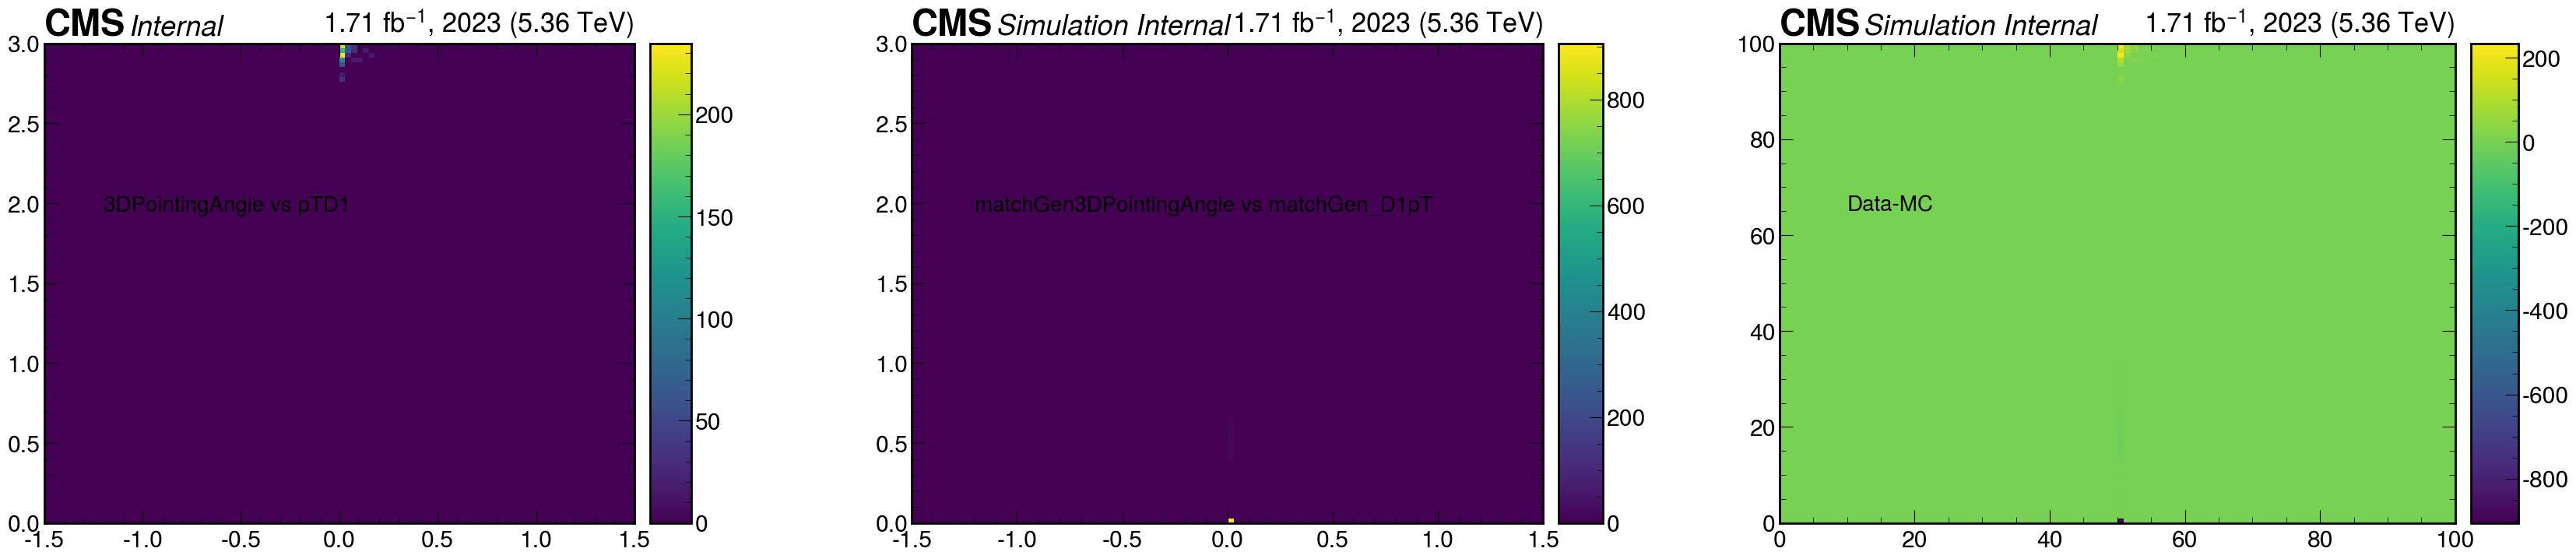

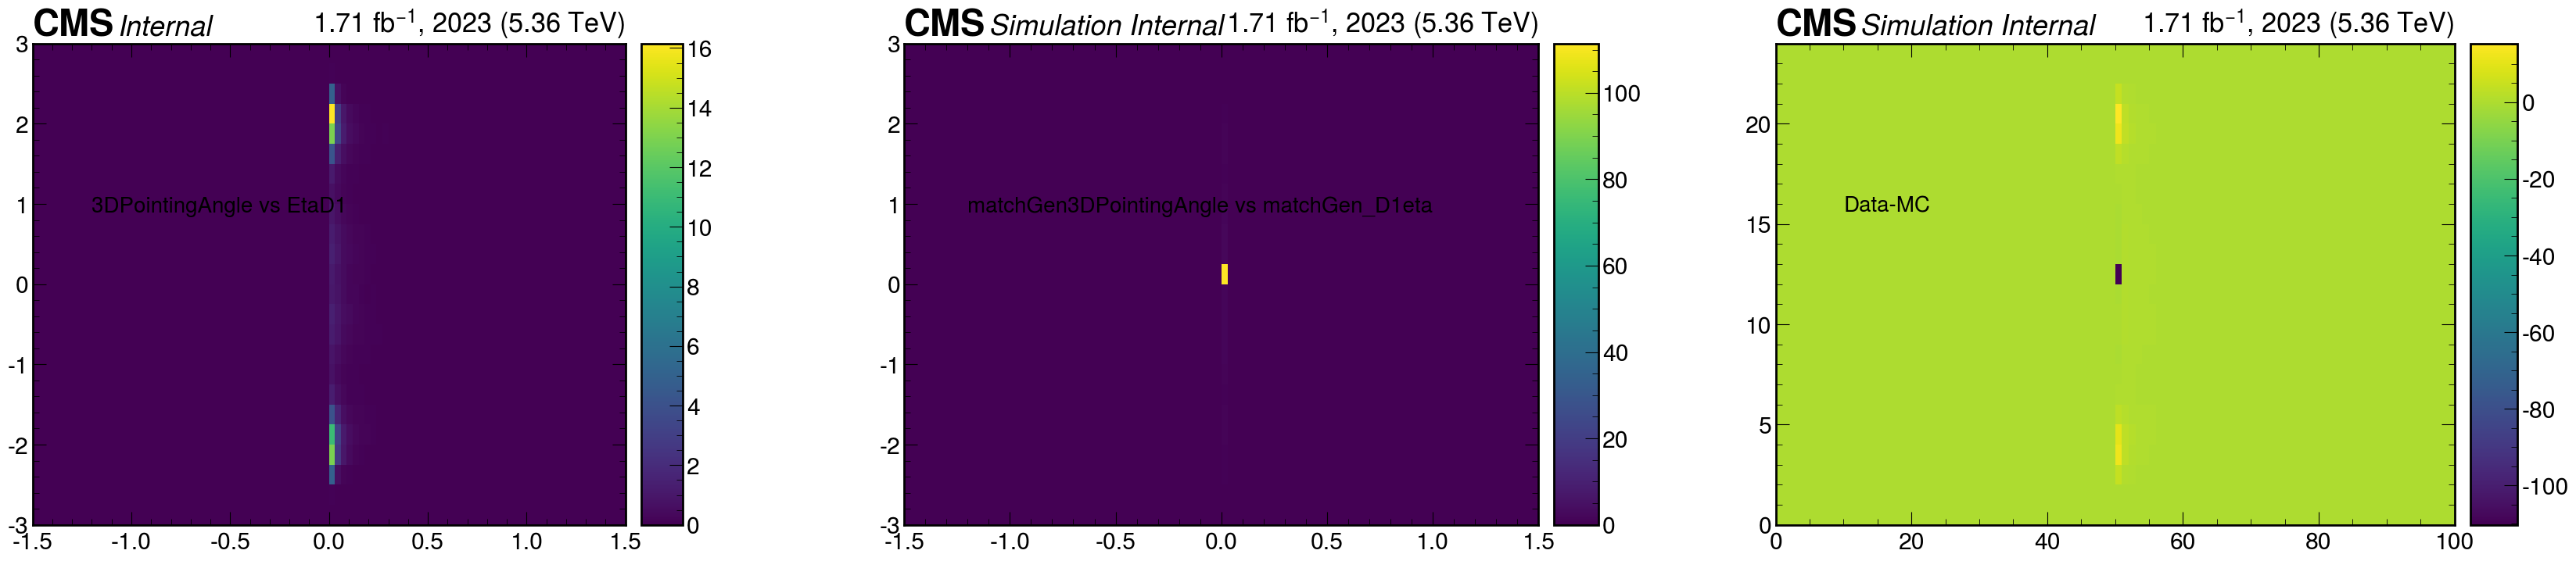

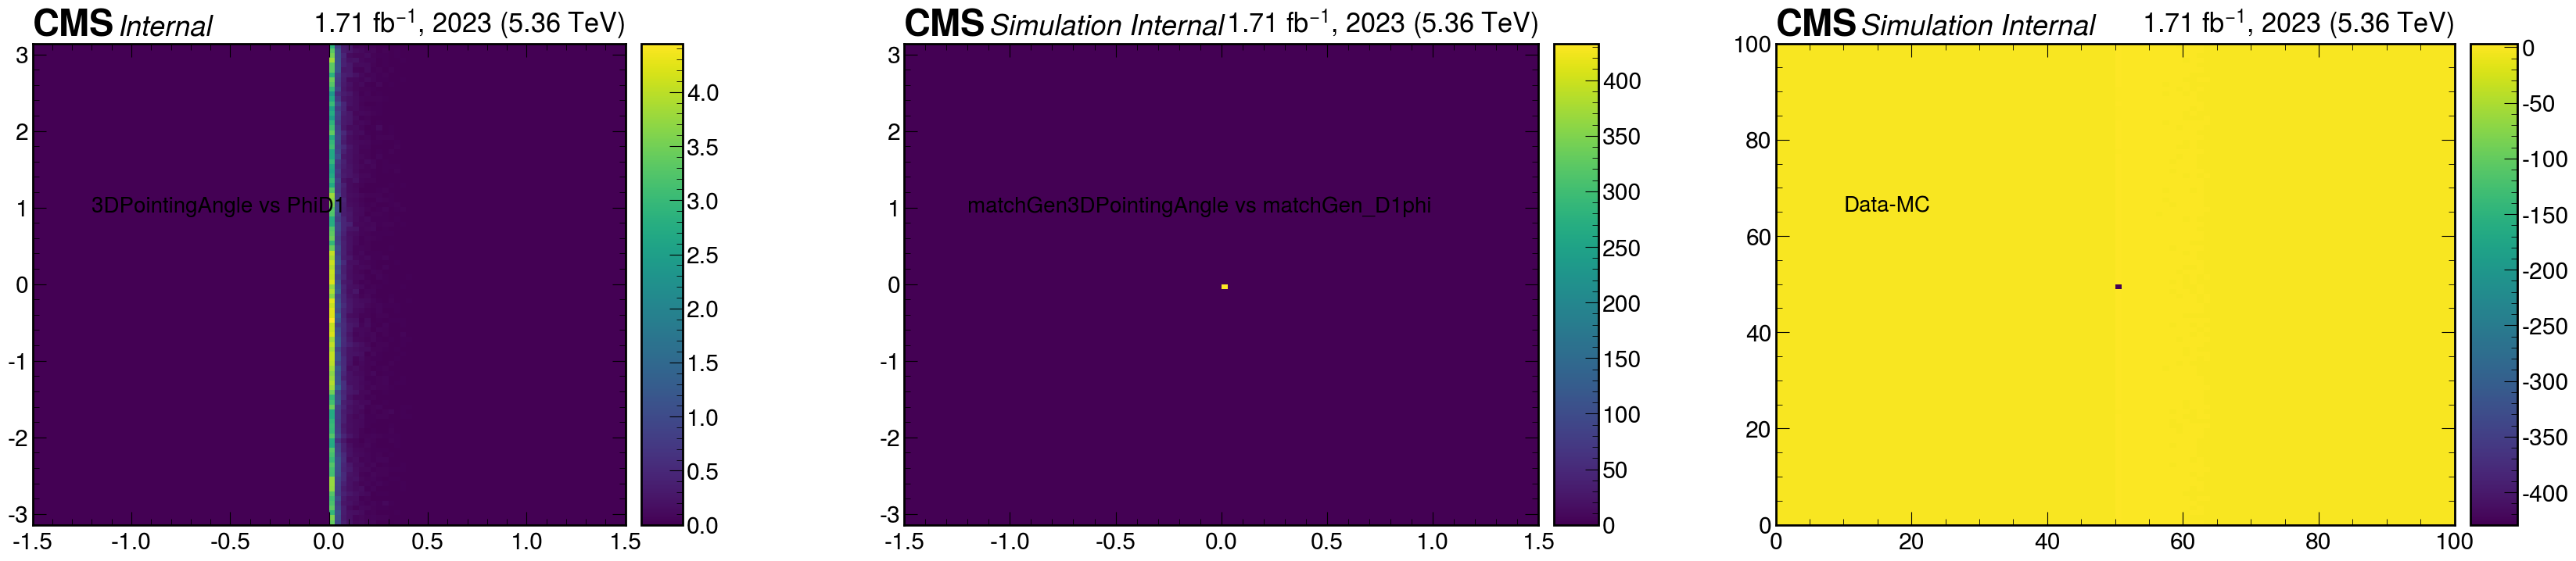

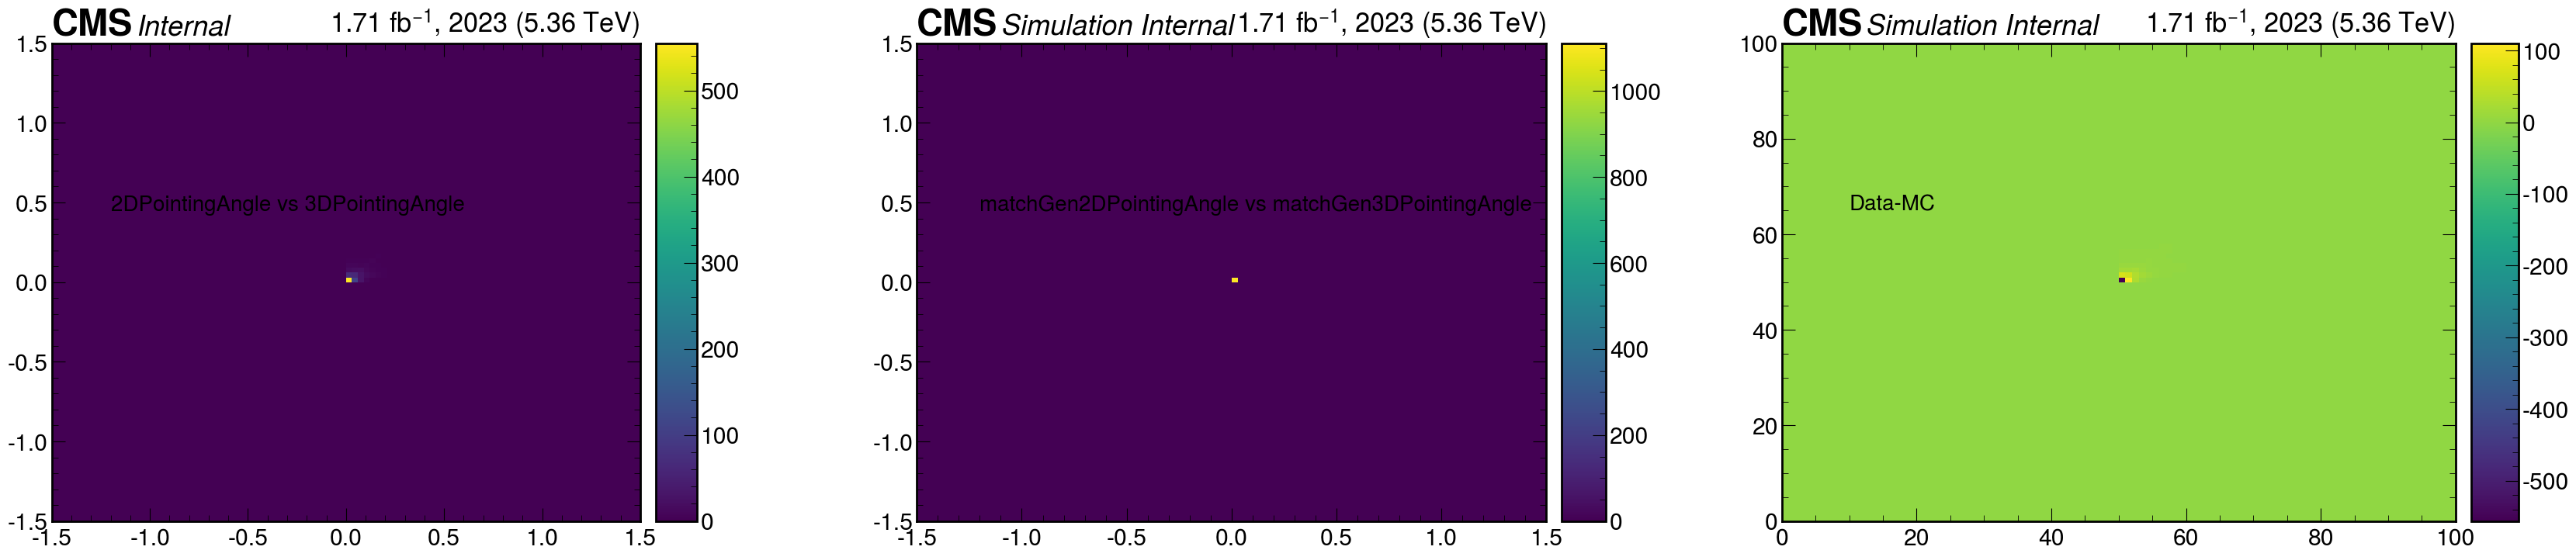

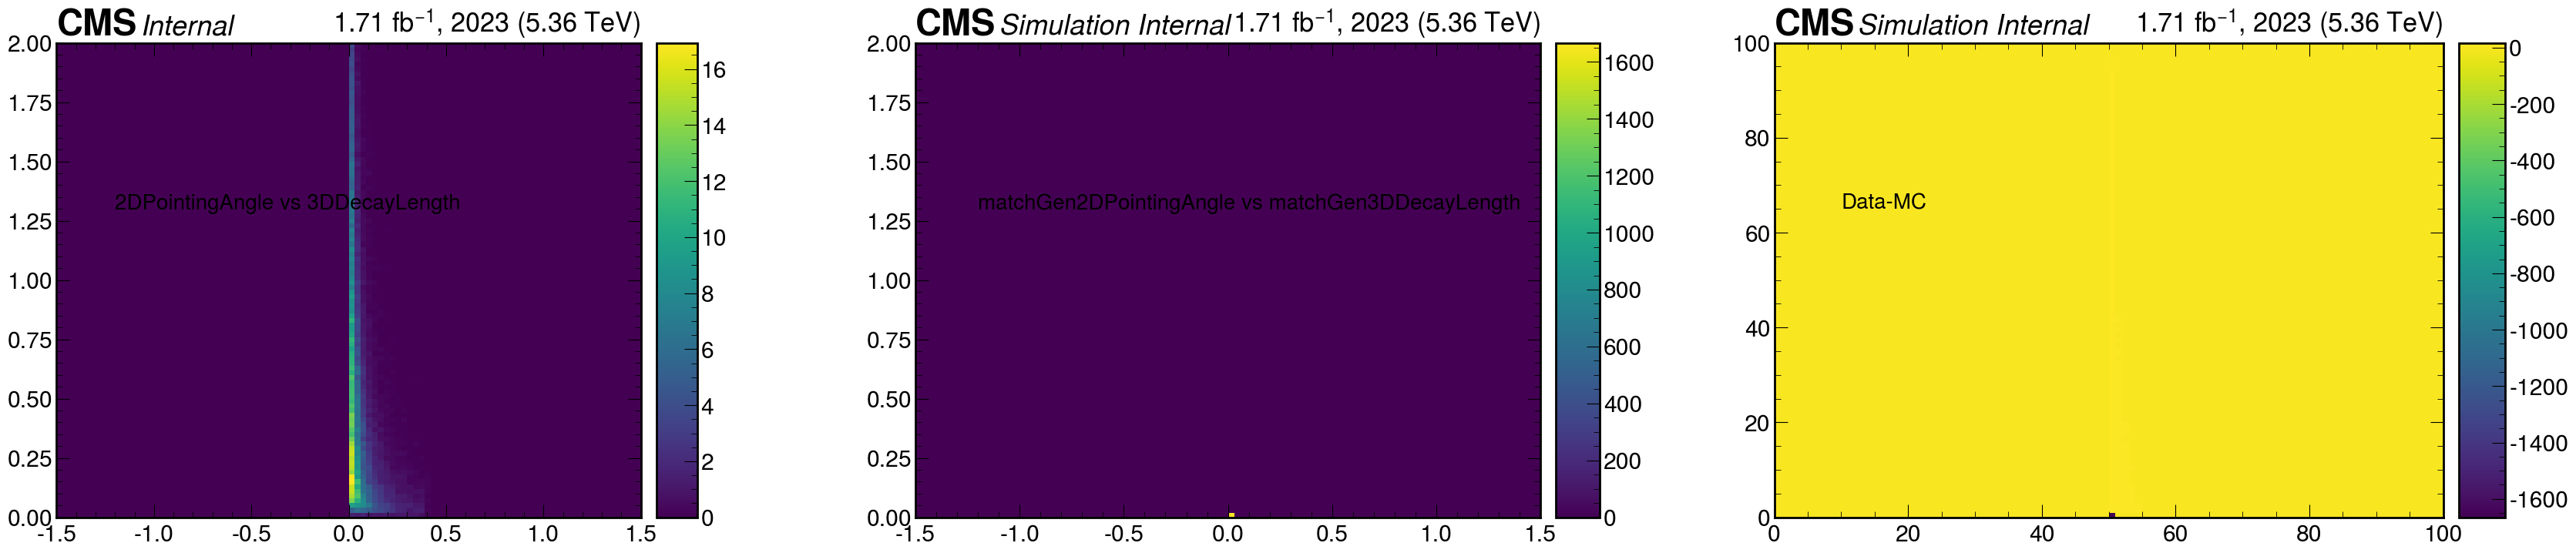

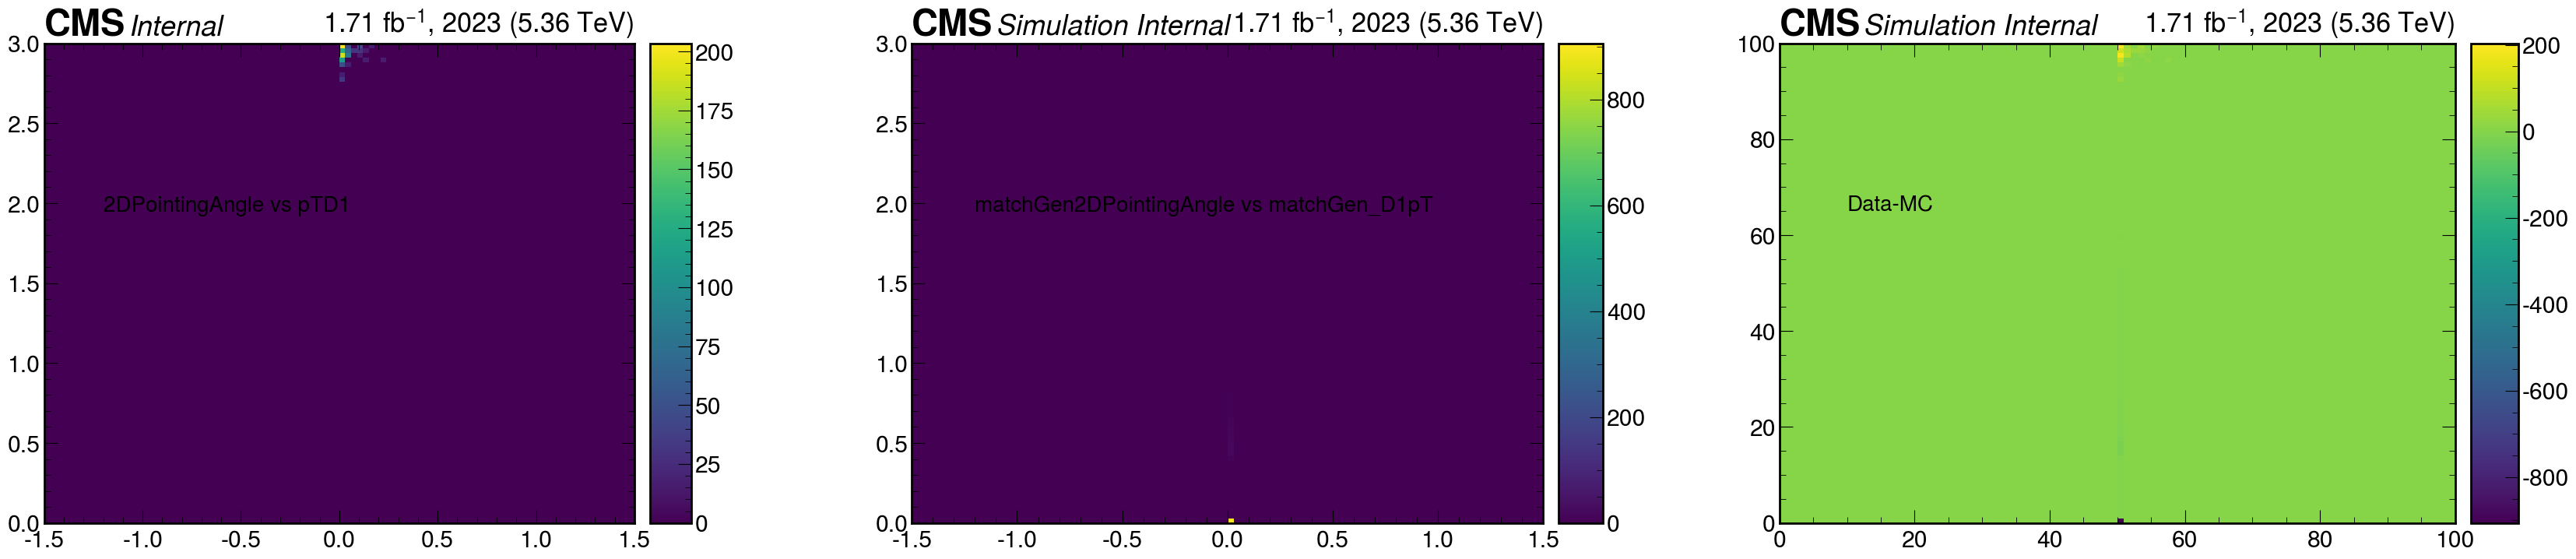

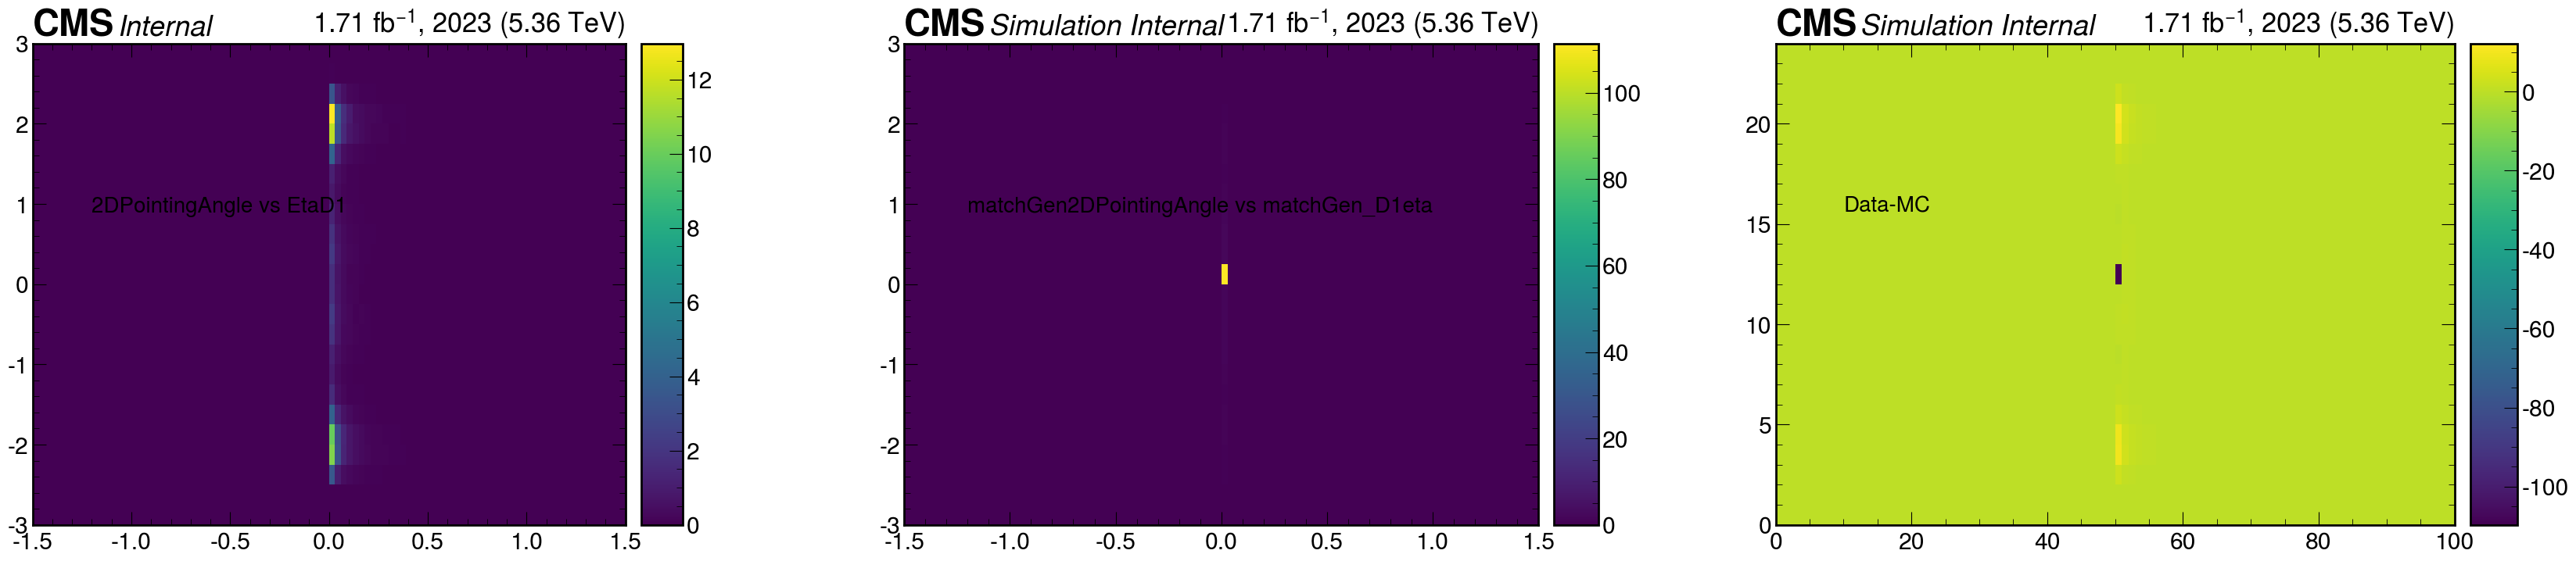

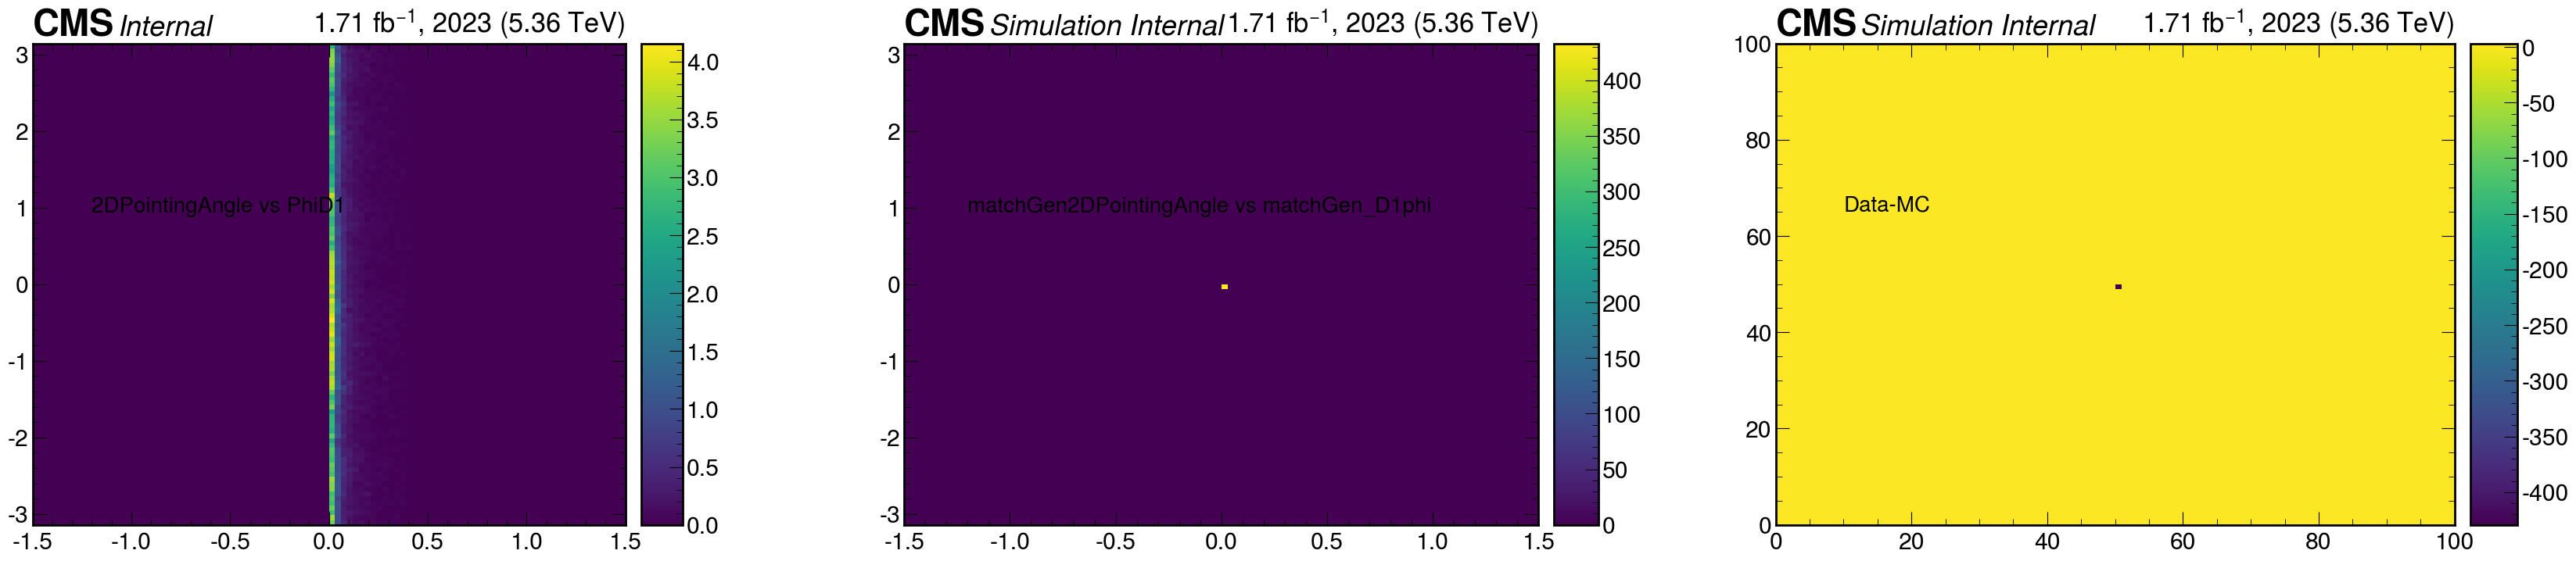

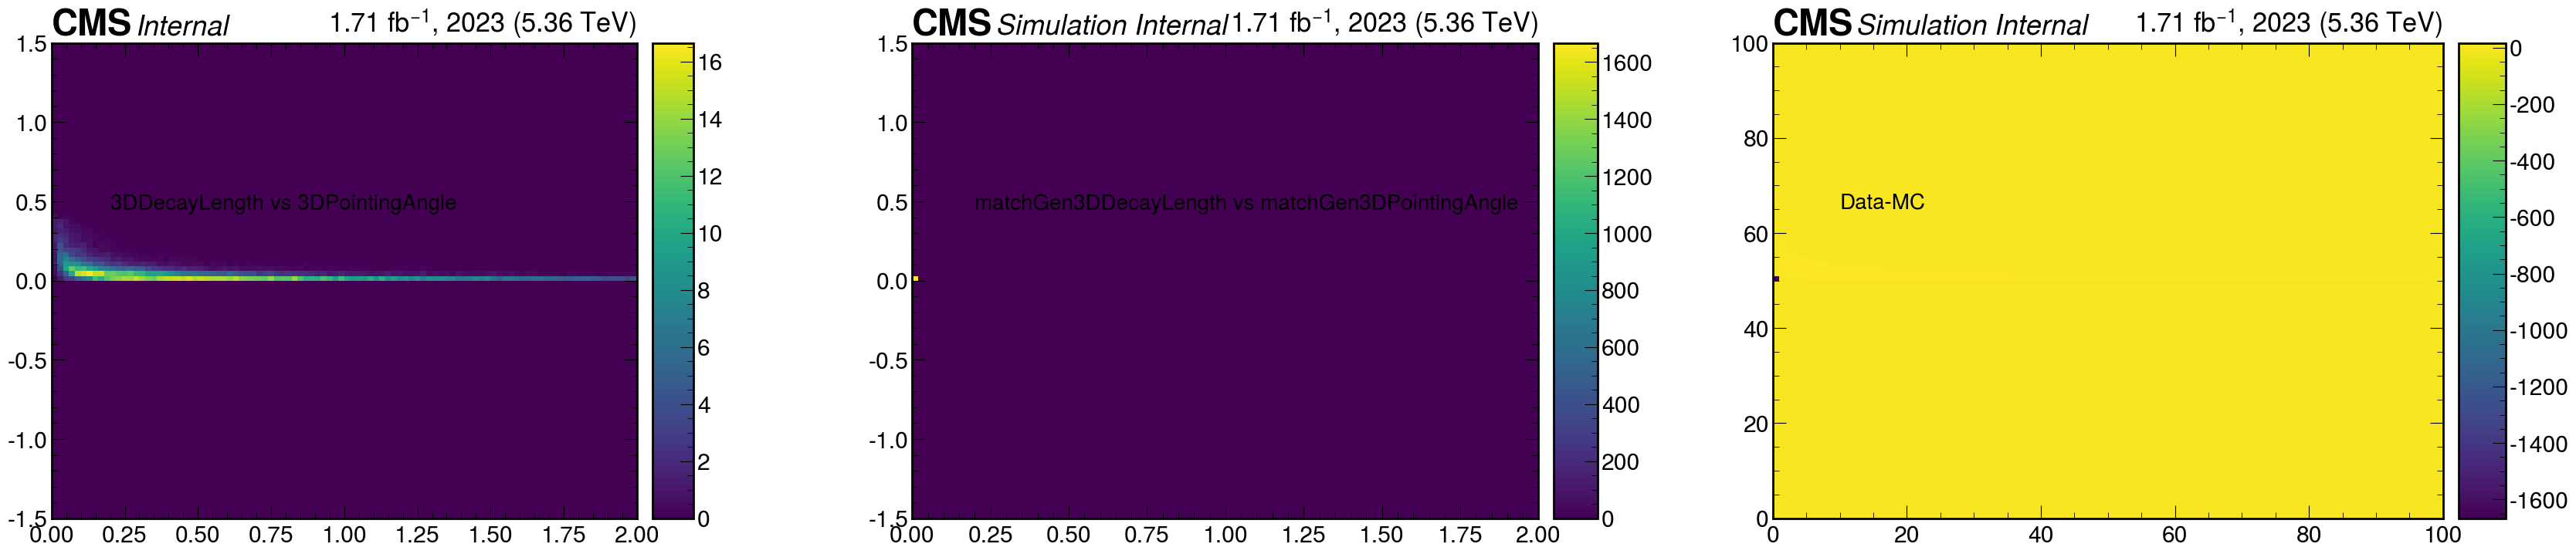

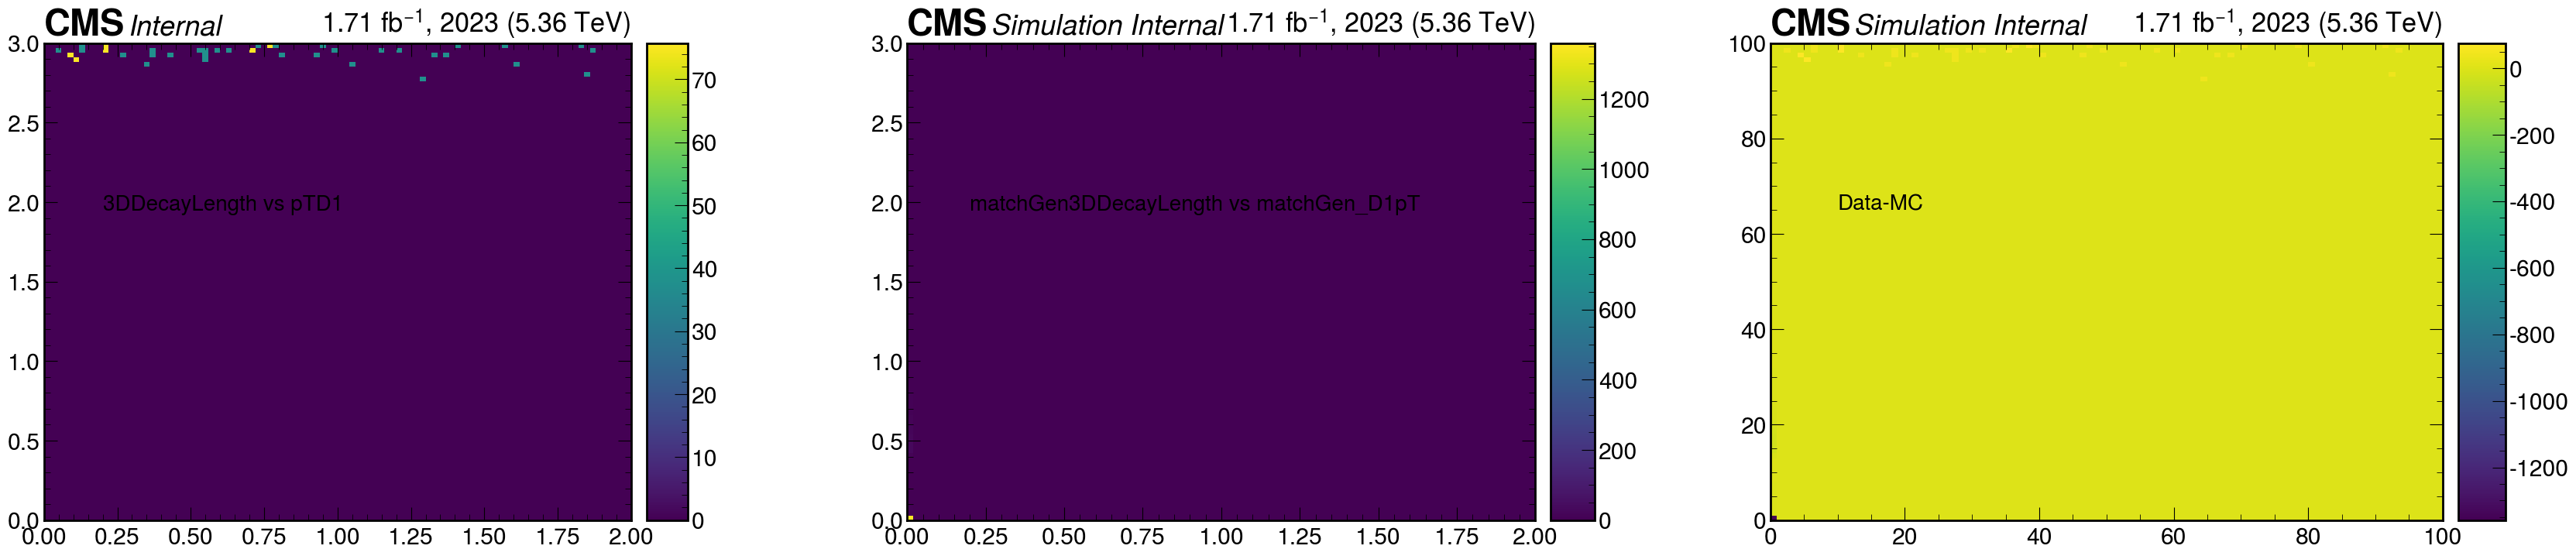

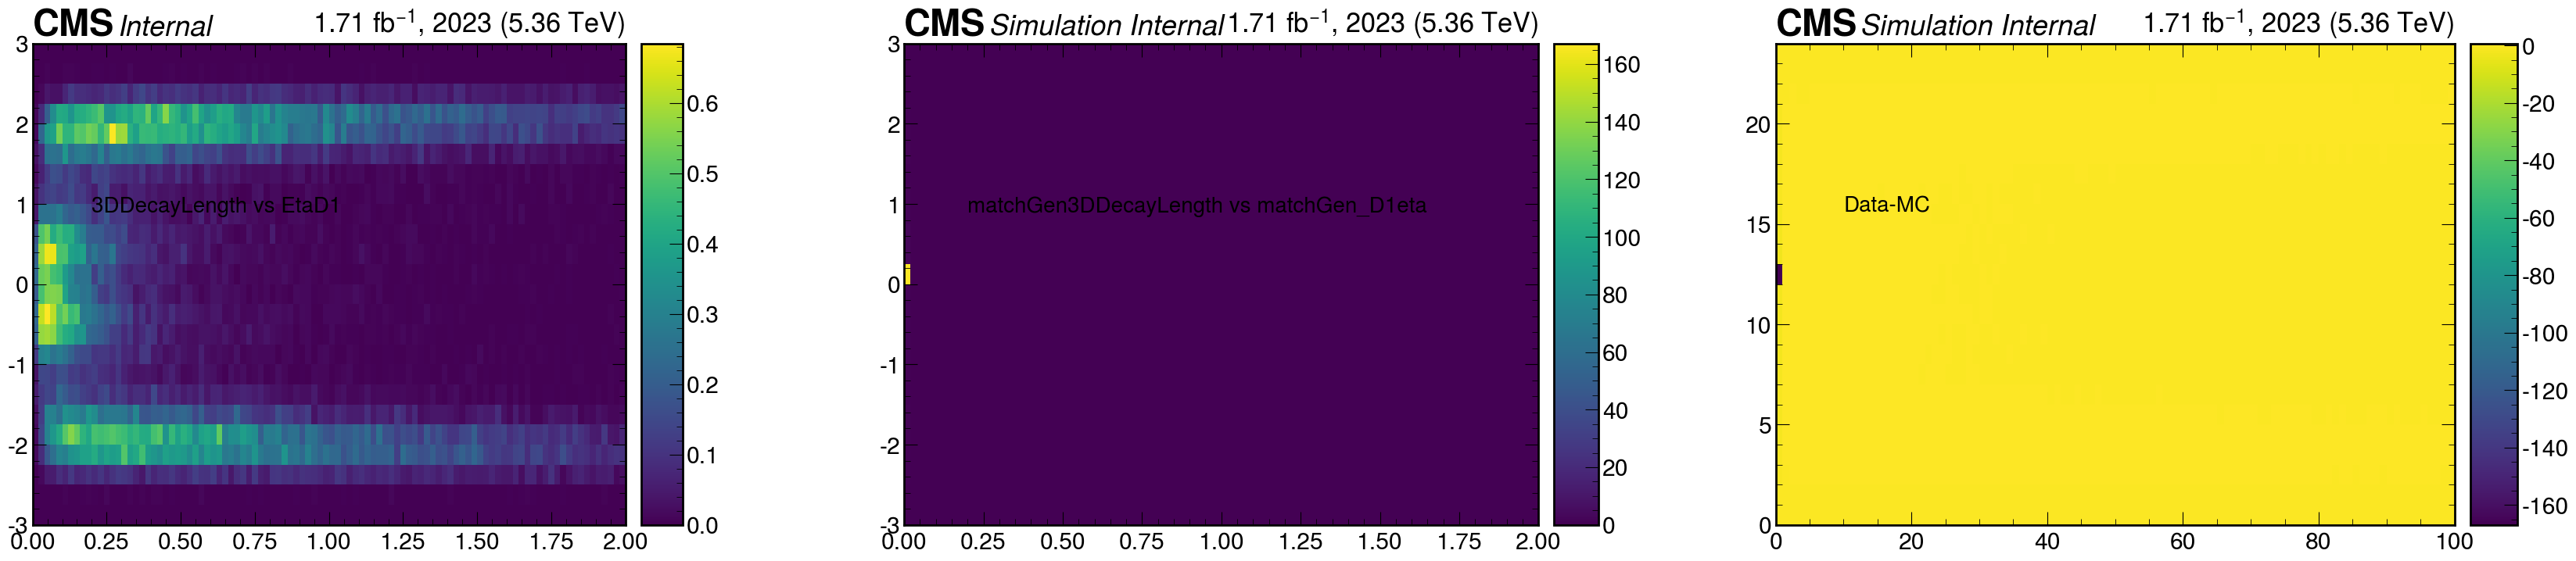

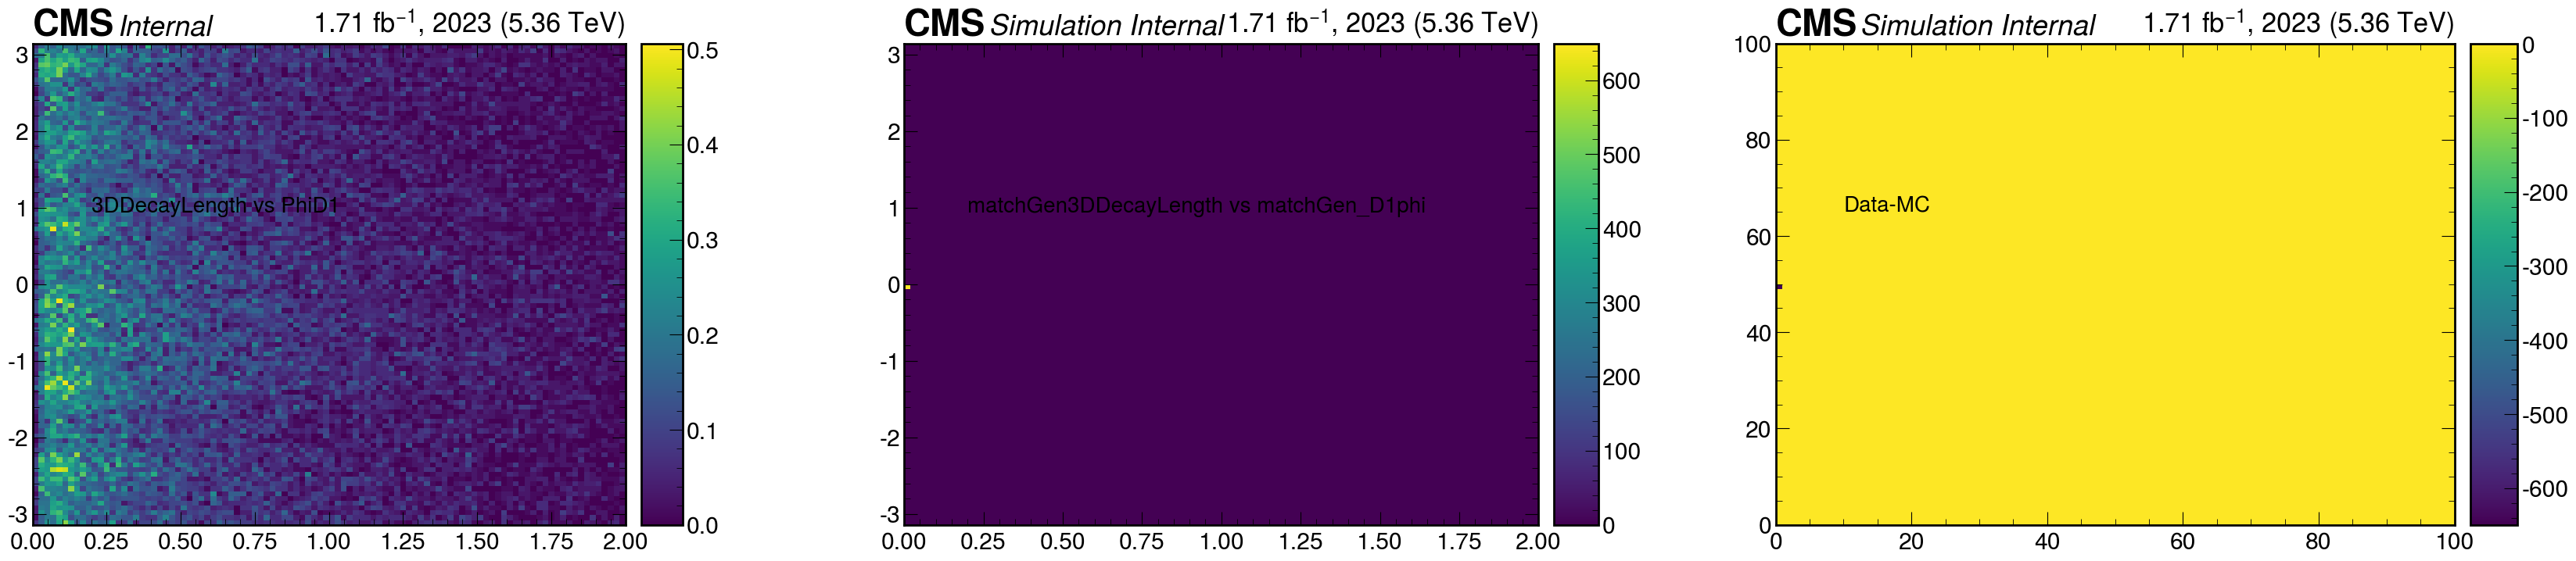

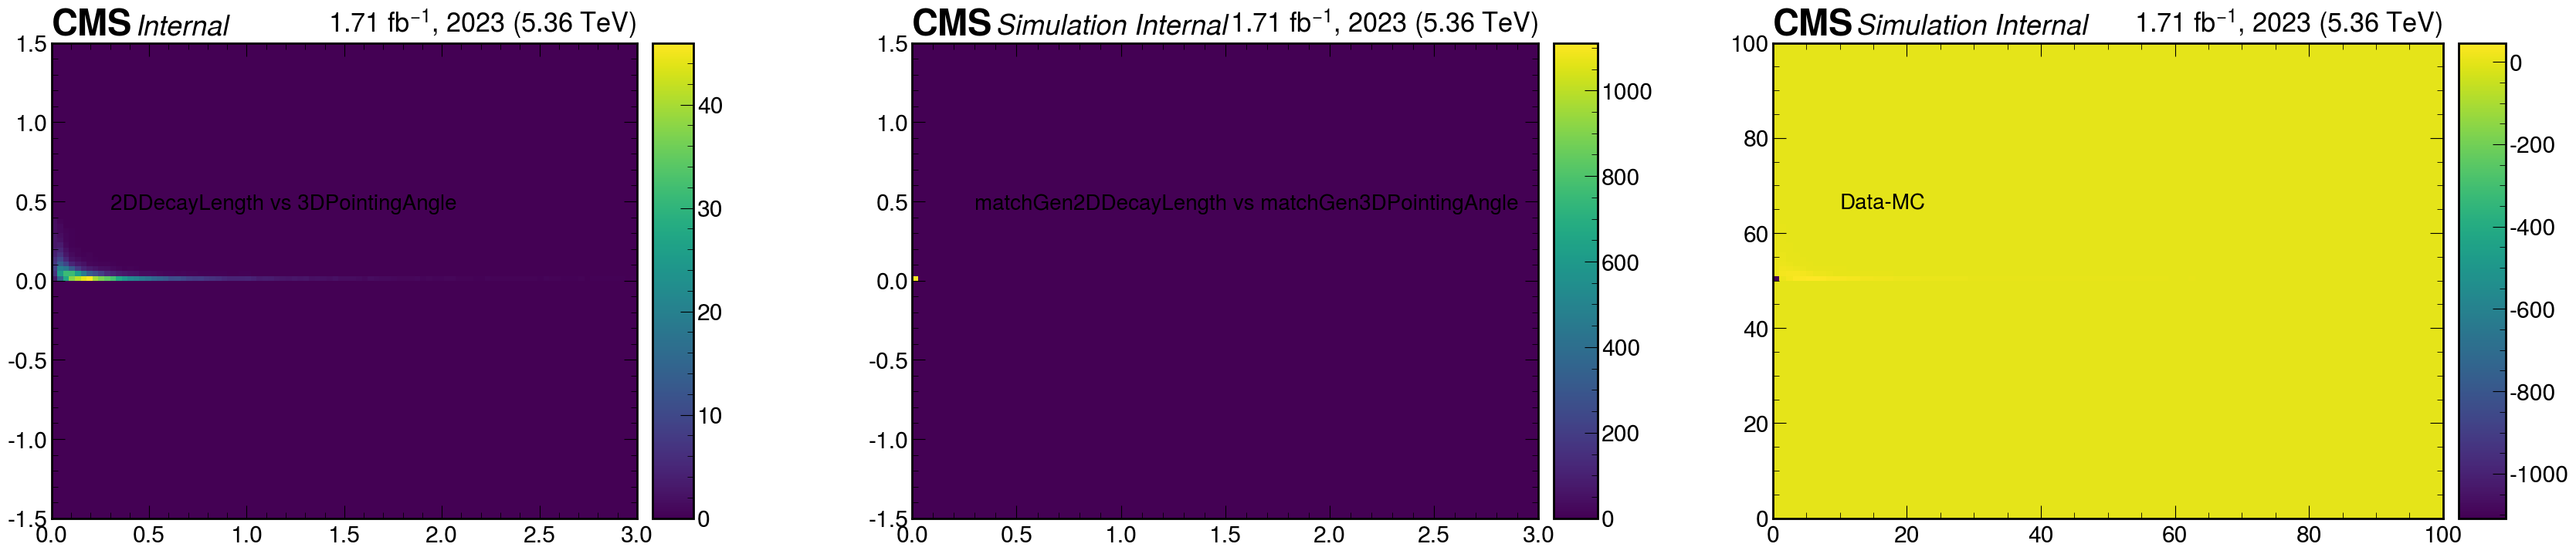

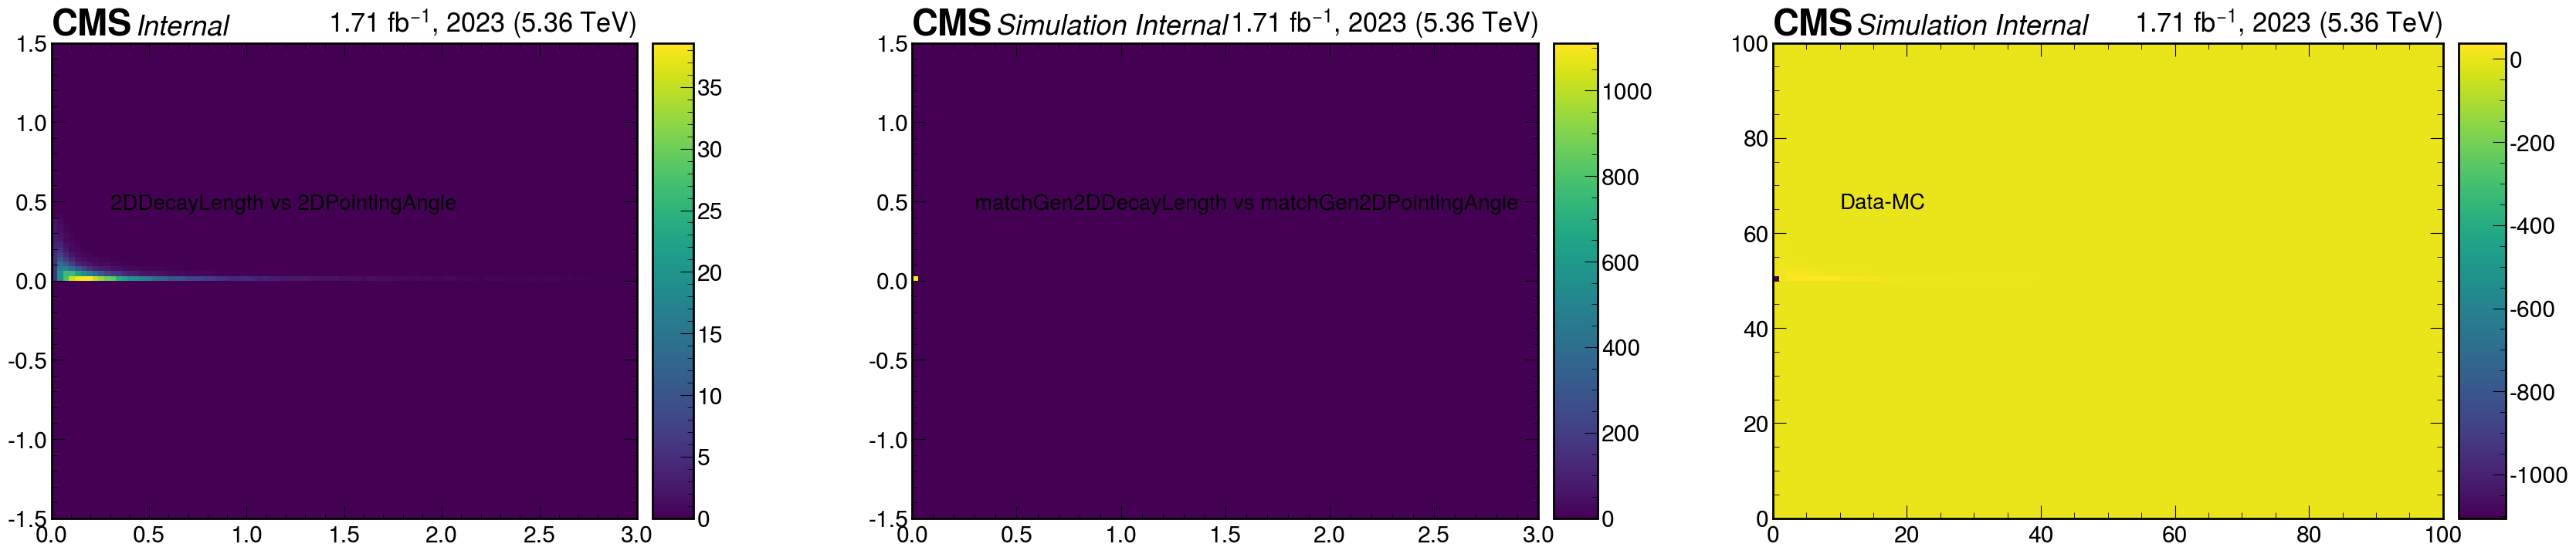

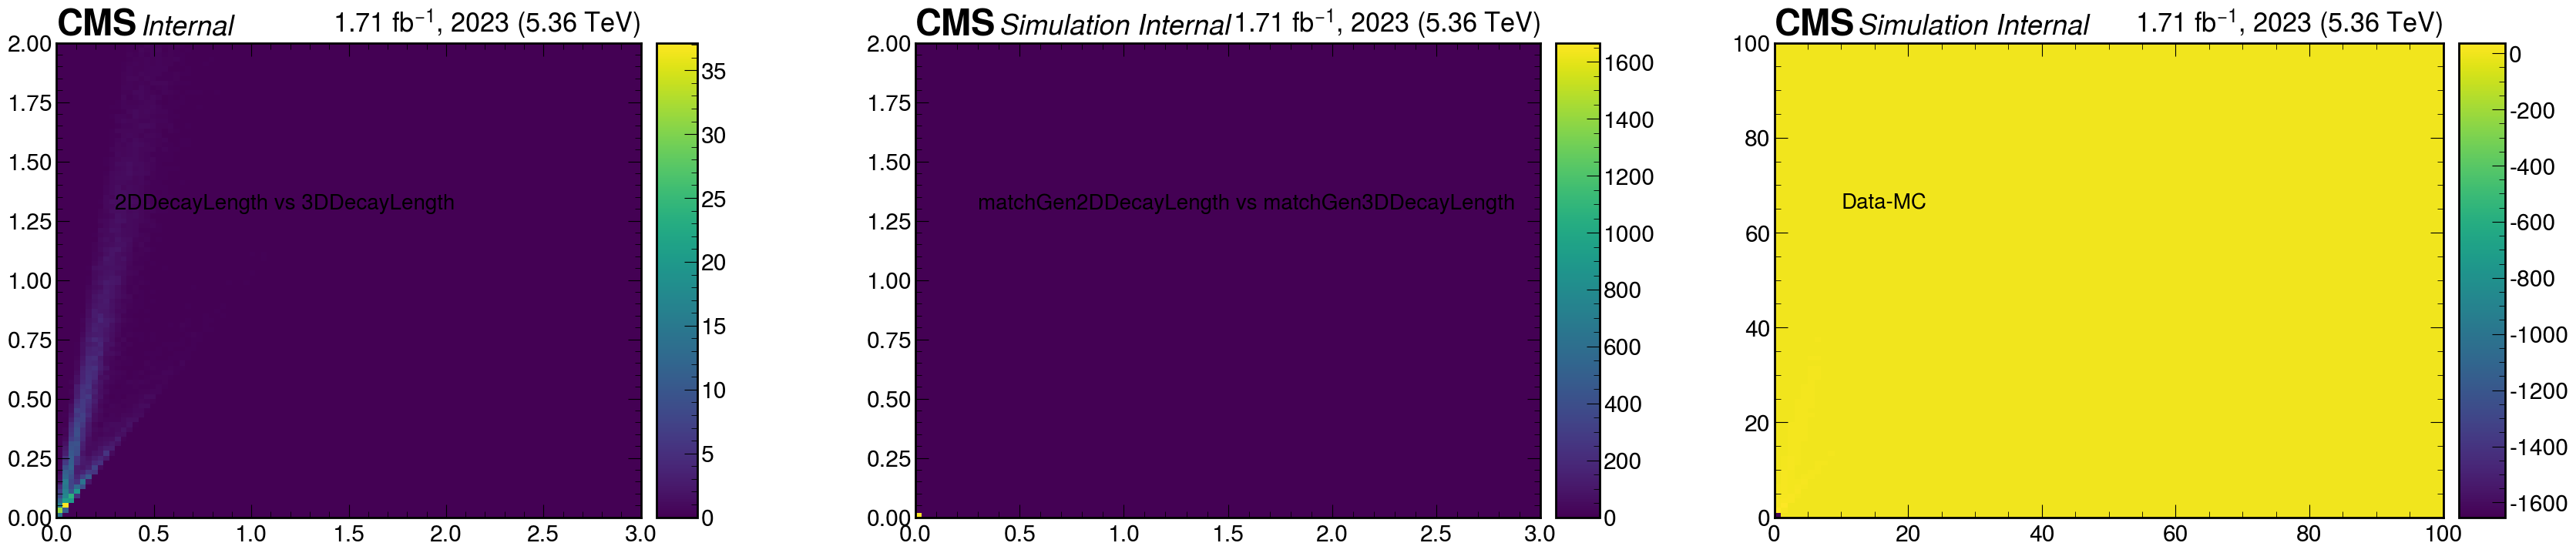

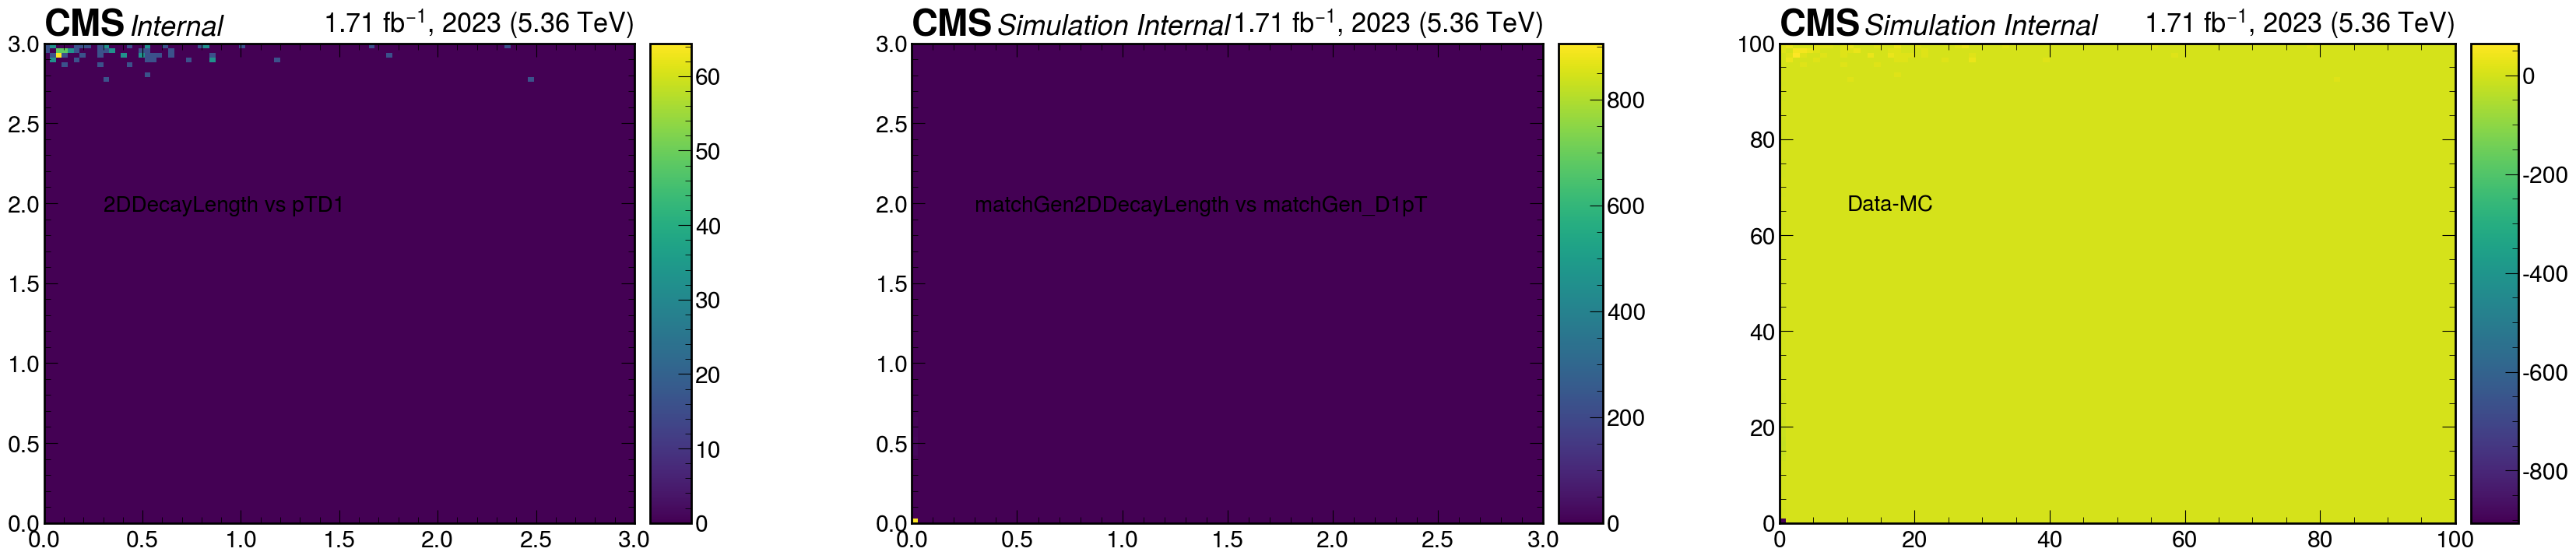

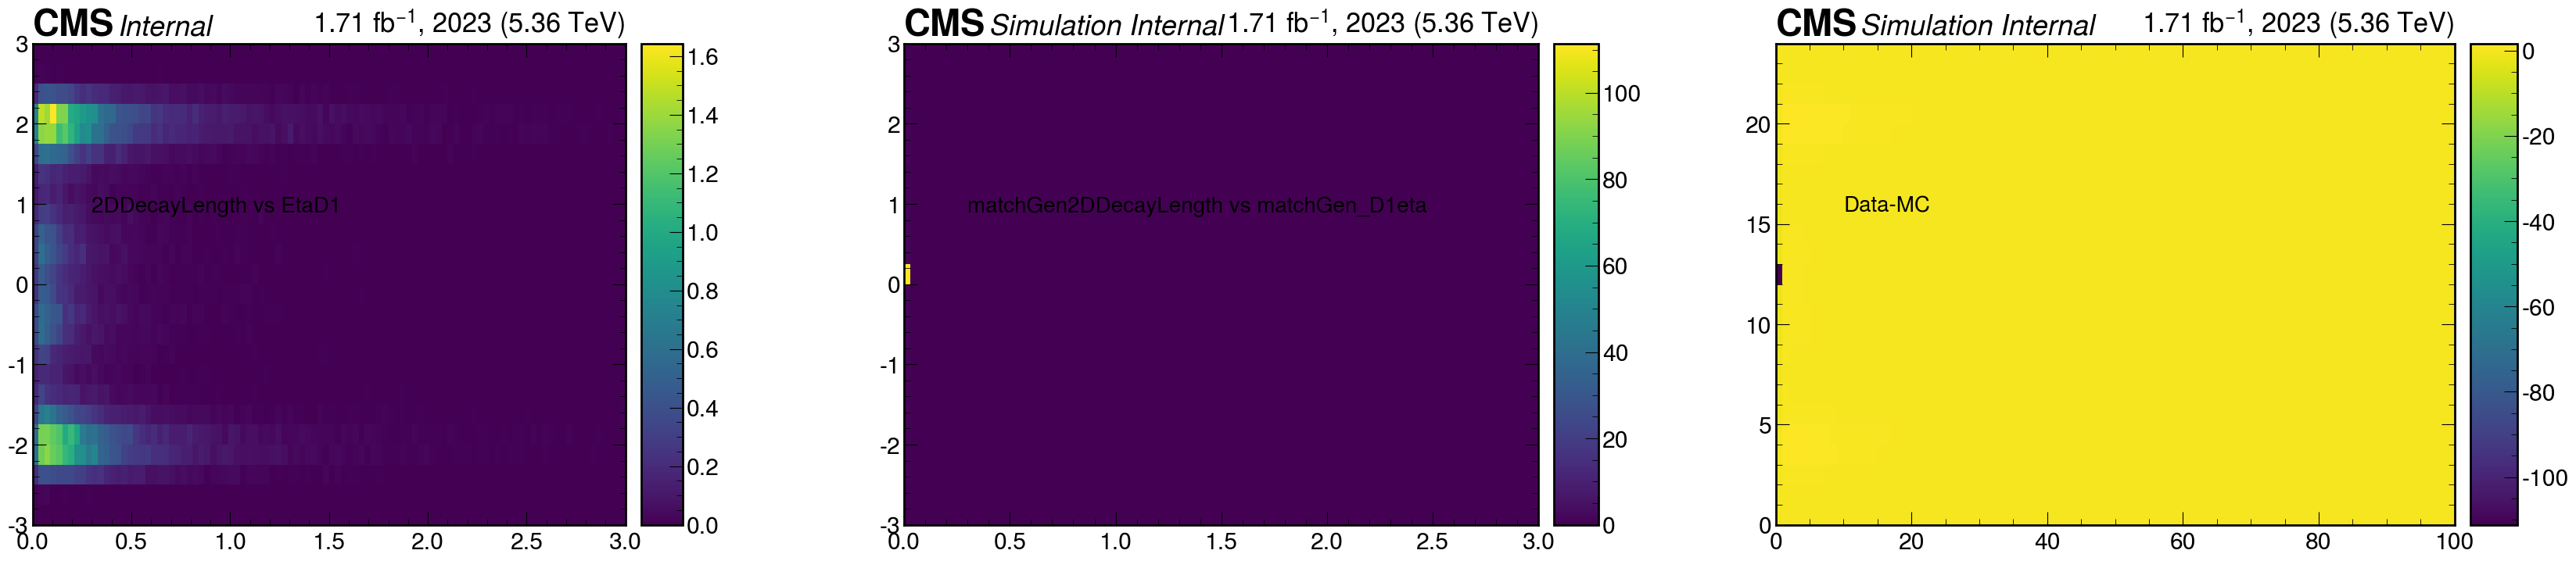

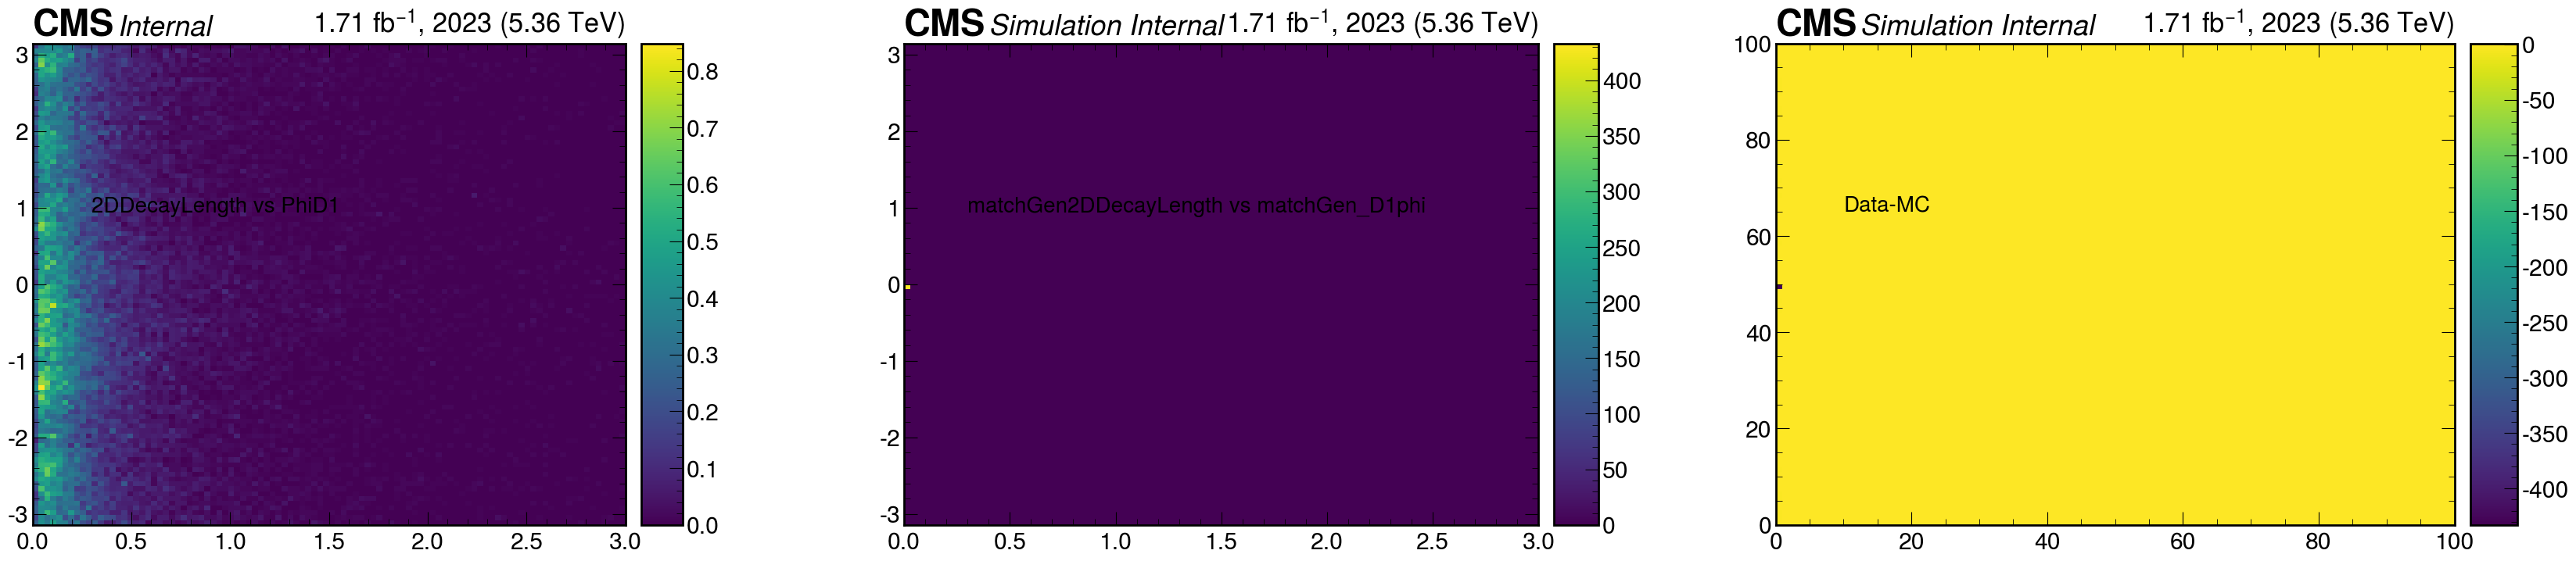

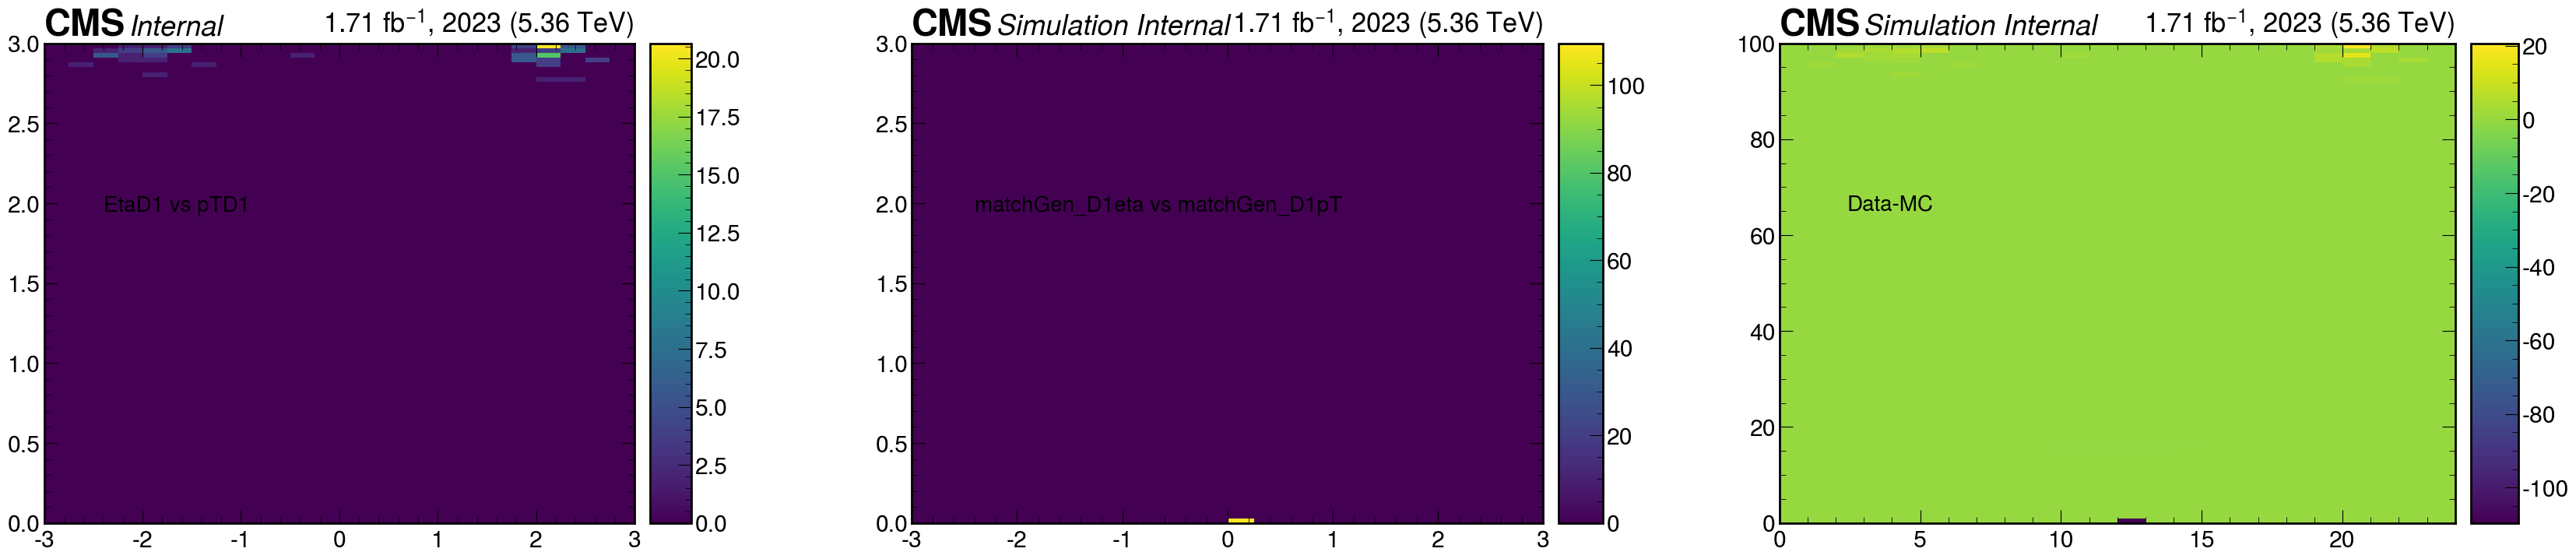

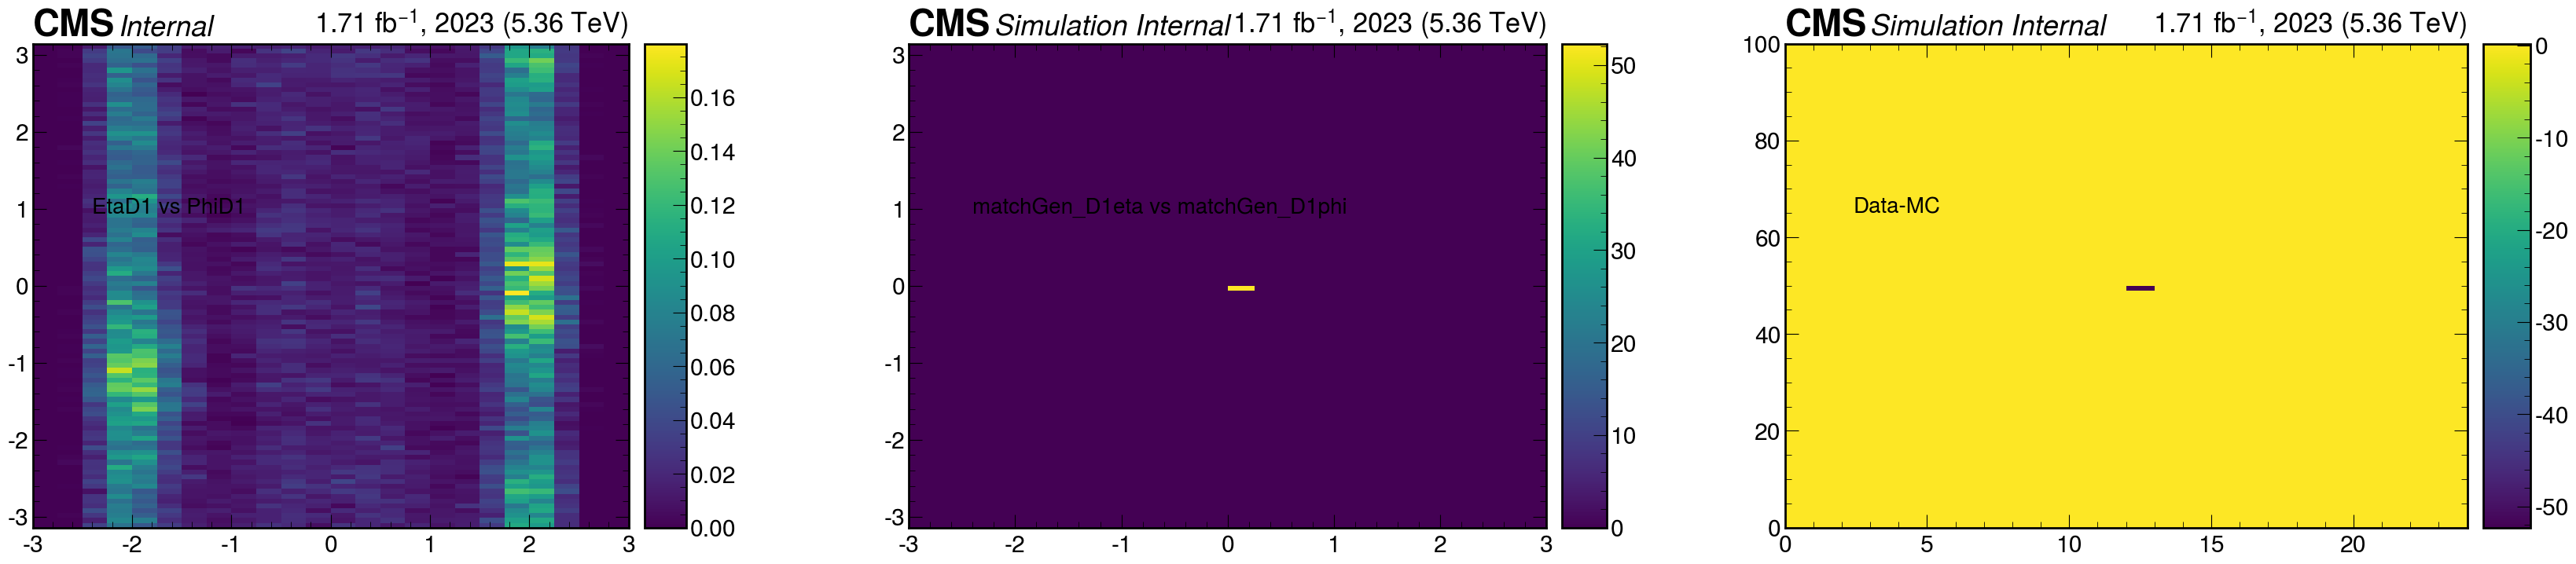

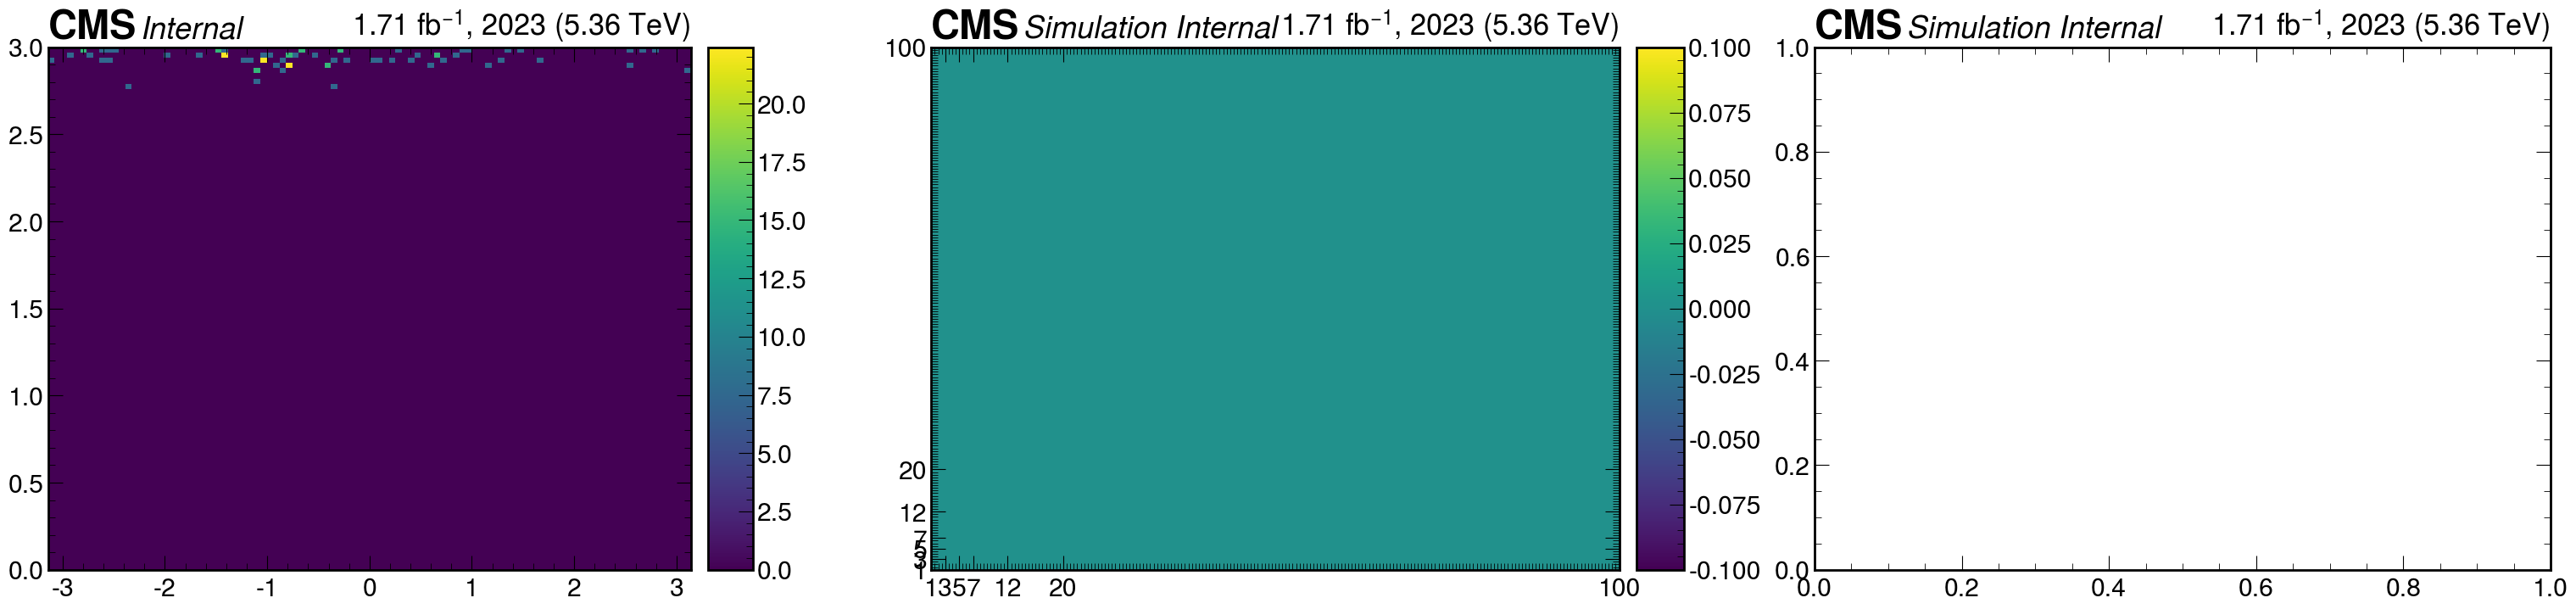

In [17]:
# Example variables for 2D histograms
# Assuming densityArr is a dictionary containing your data arrays
# For example:
# densityArr = {
#     "DATA": {"variable1": np.random.randn(1000), "variable2": np.random.randn(1000)},
#     "MCPR": {"variable1": np.random.randn(1000), "variable2": np.random.randn(1000)}
# }

# Setup CMS style for the plots
for varData1 in list(varpair.keys()):
    for varData2 in list(varpair.keys()):
        if varData1 < varData2 :
            hep.style.use("CMS")

# Create a 2D histogram plot
            #fig, axs = plt.subplot_mosaic([['plt', 'plt', 'MC','MC' 'leg']], figsize=(15, 8), empty_sentinel='leg')
            fig, axs = plt.subplot_mosaic([["AA", 'BB' ,'CC','leg']], figsize=(45, 8), empty_sentinel='leg')
            print(fig,axs,hep.cms.label)
            hep.cms.label('Internal', data=True, lumi=1.71, year=2023, com=5.36,ax=axs['AA'],)
            hep.cms.label('Internal', data=False, lumi=1.71, year=2023, com=5.36,ax=axs['BB'])
            hep.cms.label('Internal', data=False, lumi=1.71, year=2023, com=5.36,ax=axs['CC'])
            h_data = hep.hist2dplot(hist2DArr["DATA"][varData1][varData2],  ax=axs['AA'],label=["Data", "eta"])
            print(varpair[varData1],varpair[varData2])
            h_mc = hep.hist2dplot(hist2DArr["MCPR"][varpair[varData1]][varpair[varData2]],  ax=axs['BB'],label=["Data", "eta"])
            hist_1, xedge, yedge = hist2DArr["DATA"][varData1][varData2]
            hist_2,_,_=hist2DArr["MCPR"][varpair[varData1]][varpair[varData2]]
            histdiff=hist_1-hist_2
            h_sub = hep.hist2dplot(histdiff,  ax=axs['CC'],label=["Data", "eta"])
            
            # Extract the data for the two variables
            # data_x = density2DArr["DATA"]['eta']['pT']
            # print(data_x)
            # data_y = density2DArr["DATA"][varData2]
            # print(data_y)
            # mc_x = densityArr["MCPR"][varData1]
            # mc_y = densityArr["MCPR"][varData2]
            
            # Create the 2D histograms for Data and MC
            #h_data = hep.hist2dplot(density2DArr["DATA"][varData2][varData1],  ax=axs['plt'],label=["Data", "eta"])
            # h_data = hep.hist2dplot(density2DArr["DATA"][varData2][varData1],  cmap='viridis', cbar=True, ax=ax)
            # h_mc = hep.hist2dplot(mc_x, mc_y,  cmap='Oranges', cmin=1, label="MC prompt", alpha=0.5)
            
            # Add a colorbar to the plot
            # cbar = plt.colorbar(h_data[3], ax=axs['plt'], label='Counts')
            # cbar2 = plt.colorbar(h_mc[3], ax=axs['plt'], label='Counts')
            
            # Add a legend
            # axs['plt'].legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0., fontsize='xx-small', ncols=1)
            
            # Annotate the plot
            plt.text(0.1, 0.65, f'{varData1} vs {varData2}', horizontalalignment='left', transform=axs['AA'].transAxes,fontsize=20)
            plt.text(0.1, 0.65, f'{varpair[varData1]} vs {varpair[varData2]}', horizontalalignment='left', transform=axs['BB'].transAxes,fontsize=20)
            plt.text(0.1, 0.65, 'Data-MC', horizontalalignment='left', transform=axs['CC'].transAxes,fontsize=20)
            
            # Save the figure
            plt.savefig(f'variables/{varData1}_vs_{varData2}.png')

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# import mplhep as hep

# # Step 1: Generate some random data
# np.random.seed(42)
# x = np.random.normal(0, 1, 10000)
# y = np.random.normal(0, 1, 10000)

# # Step 2: Compute the 2D histogram using numpy
# H, xedges, yedges = np.histogram2d(x, y, bins=50, range=[[-3, 3], [-3, 3]])

# # Step 3: Plot using mplhep
# fig, ax = plt.subplots()
# hep.hist2dplot(H, xedges, yedges, cmap='viridis', cbar=True, ax=ax)

# # Use mplhep style
# hep.style.use("CMS")  # Apply CMS style, or another like 'ATLAS', 'ALICE', etc.

# ax.set_xlabel("X-axis")
# ax.set_ylabel("Y-axis")
# ax.set_title("2D Histogram with mplhep")

# plt.show()